# **Week 2: G2M Insight for Cab Investment Firmy**

**Project Description:** This task is to find out for a private firm in the US cab company to identify the right company to invest in. For this, market research will be made, and will be identified the right company among the two cab companies.

The Client
XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

\
Below are the information about dataset:

Time period of data is from 31/01/2016 to 31/12/2018.  

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users

\
*Submitted By: Marina Tsvetkova*

#Steps for data analysis:

##1. Investigation of data sets and joined
1. Understand the field names and data types
2. Identify relationships across the files
3. Field/feature transformations
4. Determine which files should be joined versus which ones should be appended
5. Create master data and explain the relationship
6. Identify and remove duplicates
7. Perform other analysis like NA value and outlier detection

##2. EDA and Visualisation
##3. Hypothesis tests
##4. Conclusion

# **Investigation of data sets and joined**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

import pandas as pd
import numpy as np
import datetime as dt
import datetime


from scipy.stats import ttest_ind, chi2_contingency, pearsonr, chisquare
import statsmodels.api as sm
import phik


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib import cm


!pip install phik



In [3]:
cmap = plt.get_cmap('tab20c')

In [4]:
cab_data = pd.read_csv('/content/drive/My Drive/datasets/DG/Cab_Data.csv')
city_data = pd.read_csv('/content/drive/My Drive/datasets/DG/City.csv')
customer_data = pd.read_csv('/content/drive/My Drive/datasets/DG/Customer_ID.csv')
transaction_data = pd.read_csv('/content/drive/My Drive/datasets/DG/Transaction_ID.csv')

##Investigation the first dataset (cab_data)

In [5]:
cab_data.head()

Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

In [6]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [7]:
cab_data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [8]:
#change type of 'Date of Travel' to datetime
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'], unit='D', origin='1899-12-30')
cab_data.head()

Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-02  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-07  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-03  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

In [9]:
#add 'Profit' column
cab_data['Profit'] = pd.DataFrame(cab_data["Price Charged"] - cab_data["Cost of Trip"])
cab_data.head()

Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-02  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-07  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-03  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  Profit  
0         370.95       313.635  57.315  
1         358.52       334.854  23.666  
2         125.20        97.632  27.568  
3         377.40       351.602  25.798  
4         114.62        97.776  16.844

In [10]:
company_counts =cab_data['Company'].value_counts()

city_counts = cab_data['City'].value_counts()

In [11]:
cab_data['City'].value_counts()

City
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: count, dtype: int64

In [12]:
#grouping of cities by state
cab_data['State'] = cab_data['City'].str.split().str[-1]
cab_data.head()

Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-02  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-07  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-03  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  Profit State  
0         370.95       313.635  57.315    GA  
1         358.52       334.854  23.666    GA  
2         125.20        97.632  27.568    GA  
3         377.40       351.602  25.798    GA  
4         114.62        97.776  16.844    GA

In [13]:
state_counts = cab_data['State'].value_counts()

In [14]:
cab_data['State'].value_counts()

State
NY        99885
CA        70888
IL        56625
DC        43737
MA        29692
TX        11913
VALLEY     8519
WA         7997
GA         7557
FL         6454
AZ         3995
COUNTY     3982
CO         3825
TN         3010
PA         1313
Name: count, dtype: int64

In [15]:
cab_data['State']=cab_data['State'].replace('VALLEY','CA').replace('COUNTY','CA')
cab_data['State'].value_counts()

State
NY    99885
CA    83389
IL    56625
DC    43737
MA    29692
TX    11913
WA     7997
GA     7557
FL     6454
AZ     3995
CO     3825
TN     3010
PA     1313
Name: count, dtype: int64

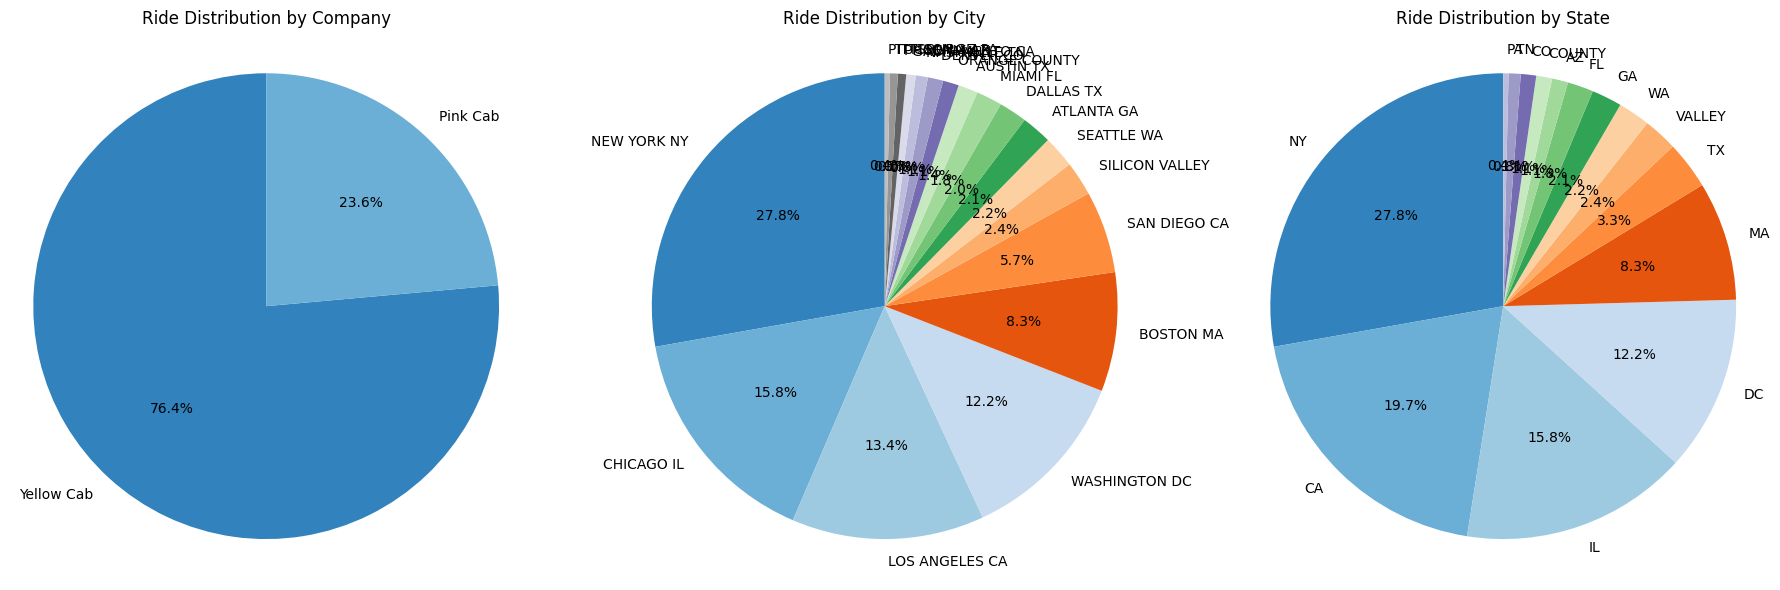

In [16]:
# Create subplot figure
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Pie chart for Company
ax[0].pie(company_counts, labels=company_counts.index, autopct='%1.1f%%', startangle=90,colors=cmap.colors)
ax[0].set_title('Ride Distribution by Company')
ax[0].axis('equal')

# Pie chart for City
ax[1].pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=90,colors=cmap.colors)
ax[1].set_title('Ride Distribution by City')
ax[1].axis('equal')

# Pie chart for State
ax[2].pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=90,colors=cmap.colors)
ax[2].set_title('Ride Distribution by State')
ax[2].axis('equal')

# Display the charts
plt.tight_layout()
plt.show()

In [17]:
cab_data.describe()

Transaction ID                 Date of Travel   KM Travelled  \
count    3.593920e+05                         359392  359392.000000   
mean     1.022076e+07  2017-08-17 01:37:55.042293760      22.567254   
min      1.000001e+07            2016-01-02 00:00:00       1.900000   
25%      1.011081e+07            2016-11-23 00:00:00      12.000000   
50%      1.022104e+07            2017-09-10 00:00:00      22.440000   
75%      1.033094e+07            2018-05-12 00:00:00      32.960000   
max      1.044011e+07            2018-12-31 00:00:00      48.000000   
std      1.268058e+05                            NaN      12.233526   

       Price Charged   Cost of Trip         Profit  
count  359392.000000  359392.000000  359392.000000  
mean      423.443311     286.190113     137.253198  
min        15.600000      19.000000    -220.060000  
25%       206.437500     151.200000      28.012000  
50%       386.360000     282.480000      81.962000  
75%       583.660000     413.683200     190.030000  
max      2048.030000     691.200000    1463.966000  
std       274.378911     157.993661     160.311840

In [18]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
 7   Profit          359392 non-null  float64       
 8   State           359392 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 24.7+ MB


In [19]:
# Group data by 'Company'
company_group = cab_data.groupby('Company')

# Calculate statistics
total_rides = company_group.size()  # Total rides per company
avg_km = company_group['KM Travelled'].mean()  # Average kilometers traveled per ride
avg_price = company_group['Price Charged'].mean()  # Average price charged per ride
total_cost = company_group['Cost of Trip'].sum()  # Total cost of all trips

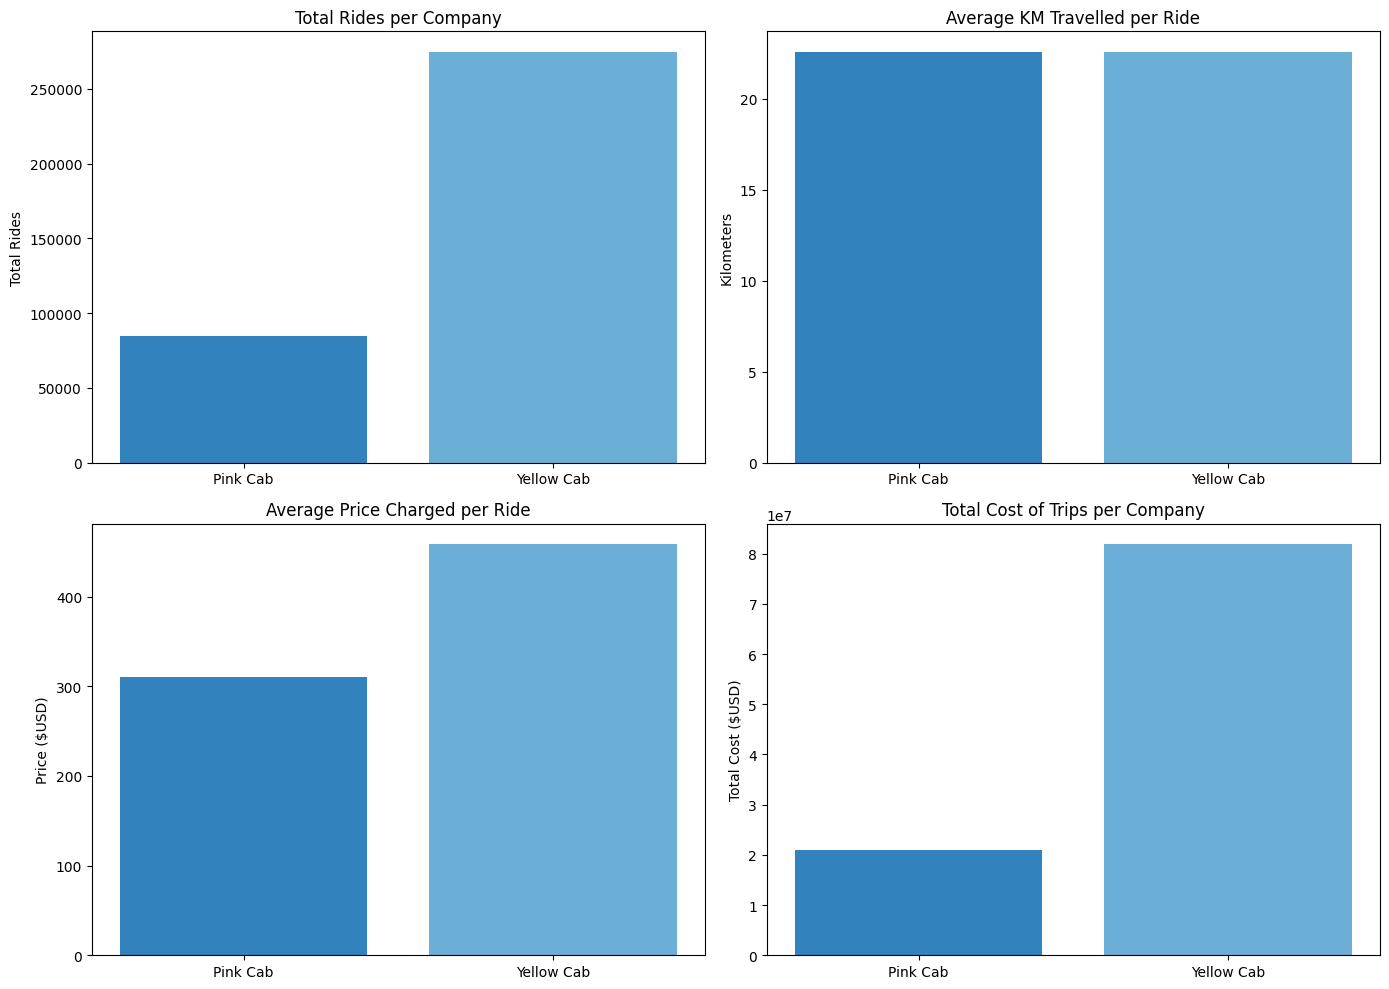

In [20]:
# Plotting the statistics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
company_colors = cmap.colors[:len(total_rides)]
# Total rides per company
axes[0, 0].bar(total_rides.index, total_rides, color=company_colors)
axes[0, 0].set_title('Total Rides per Company')
axes[0, 0].set_ylabel('Total Rides')

# Average kilometers traveled per ride
axes[0, 1].bar(avg_km.index, avg_km, color=company_colors)
axes[0, 1].set_title('Average KM Travelled per Ride')
axes[0, 1].set_ylabel('Kilometers')

# Average price charged per ride
axes[1, 0].bar(avg_price.index, avg_price, color=company_colors)
axes[1, 0].set_title('Average Price Charged per Ride')
axes[1, 0].set_ylabel('Price ($USD)')

# Total cost of trips
axes[1, 1].bar(total_cost.index, total_cost, color=company_colors)
axes[1, 1].set_title('Total Cost of Trips per Company')
axes[1, 1].set_ylabel('Total Cost ($USD)')

# Layout adjustment
plt.tight_layout()
plt.show()

##Investigation the second dataset (city_data)

In [21]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [22]:
city_data.head(20)

City   Population      Users
0        NEW YORK NY   8,405,837    302,149 
1         CHICAGO IL   1,955,130    164,468 
2     LOS ANGELES CA   1,595,037    144,132 
3           MIAMI FL   1,339,155     17,675 
4     SILICON VALLEY   1,177,609     27,247 
5      ORANGE COUNTY   1,030,185     12,994 
6       SAN DIEGO CA     959,307     69,995 
7         PHOENIX AZ     943,999      6,133 
8          DALLAS TX     942,908     22,157 
9         ATLANTA GA     814,885     24,701 
10         DENVER CO     754,233     12,421 
11         AUSTIN TX     698,371     14,978 
12        SEATTLE WA     671,238     25,063 
13         TUCSON AZ     631,442      5,712 
14  SAN FRANCISCO CA     629,591    213,609 
15     SACRAMENTO CA     545,776      7,044 
16     PITTSBURGH PA     542,085      3,643 
17     WASHINGTON DC     418,859    127,001 
18      NASHVILLE TN     327,225      9,270 
19         BOSTON MA     248,968     80,021

In [23]:
city_data.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [24]:
#Changing the data type
city_data['Population'] = city_data['Population'].str.replace(',', '').astype(int)
city_data['Users'] = city_data['Users'].str.replace(',', '').astype(int)
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [25]:
city_data.describe()

Population          Users
count  2.000000e+01      20.000000
mean   1.231592e+06   64520.650000
std    1.740127e+06   83499.375289
min    2.489680e+05    3643.000000
25%    6.086372e+05   11633.250000
50%    7.845590e+05   23429.000000
75%    1.067041e+06   91766.000000
max    8.405837e+06  302149.000000

In [26]:
city_data.head()

City  Population   Users
0     NEW YORK NY     8405837  302149
1      CHICAGO IL     1955130  164468
2  LOS ANGELES CA     1595037  144132
3        MIAMI FL     1339155   17675
4  SILICON VALLEY     1177609   27247

##Investigation the third dataset (customer_data)

In [27]:
customer_data.head()

Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

In [28]:
customer_data.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [29]:
customer_data['Gender'].value_counts()

Gender
Male      26562
Female    22609
Name: count, dtype: int64

In [30]:
gender_counts = customer_data['Gender'].value_counts()

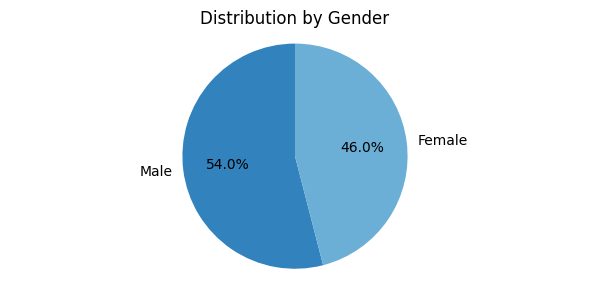

In [31]:
# Create subplot figure
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

# Pie chart for Gender
ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=cmap.colors)
ax.set_title('Distribution by Gender')
ax.axis('equal')

# Display the charts
plt.tight_layout()
plt.show()

In [32]:
customer_data.describe()

Customer ID           Age  Income (USD/Month)
count  49171.000000  49171.000000        49171.000000
mean   28398.252283     35.363121        15015.631856
std    17714.137333     12.599066         8002.208253
min        1.000000     18.000000         2000.000000
25%    12654.500000     25.000000         8289.500000
50%    27631.000000     33.000000        14656.000000
75%    43284.500000     42.000000        21035.000000
max    60000.000000     65.000000        35000.000000

##Investigation the forth dataset (transaction_data)

In [33]:
transaction_data.head()

Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card

In [34]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [35]:
transaction_data.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [36]:
transaction_data.describe()

Transaction ID    Customer ID
count    4.400980e+05  440098.000000
mean     1.022006e+07   23619.513120
std      1.270455e+05   21195.549816
min      1.000001e+07       1.000000
25%      1.011004e+07    3530.000000
50%      1.022006e+07   15168.000000
75%      1.033008e+07   43884.000000
max      1.044011e+07   60000.000000

In [37]:
Payment_type_counts=transaction_data['Payment_Mode'].value_counts()

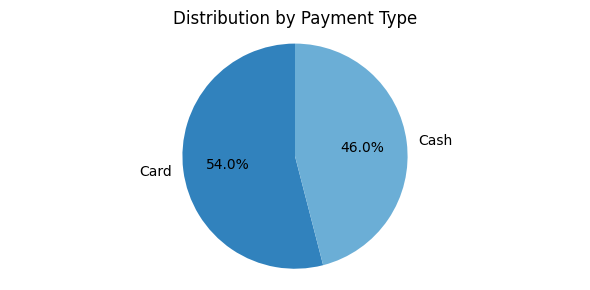

In [38]:
# Create subplot figure
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

# Pie chart for Gender
ax.pie(gender_counts, labels=Payment_type_counts.index, autopct='%1.1f%%', startangle=90, colors=cmap.colors)
ax.set_title('Distribution by Payment Type')
ax.axis('equal')

# Display the charts
plt.tight_layout()
plt.show()

#Merging data

In [39]:
transaction_data.info()
cab_data.info()
customer_data.info()
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
 7   Profit          359392

**DataFrames:**

transaction_data: Contains transaction details (Transaction ID, Customer ID, etc.).

cab_data: Contains details about cab trips linked to transactions (Transaction ID, Date of Travel, Company, etc.).

customer_data: Contains information about customers (Customer ID, Gender, Age, etc.).

city_data: Contains demographic information about cities (City, Population, Users).

**Plan to Merge:**

Merge transaction_data with cab_data: This will link transaction details with trip specifics using Transaction ID.

Merge the resulting data with customer_data: This will append detailed customer information using Customer ID.

Finally, merge the combined data with city_data: This will integrate city demographic information based on City.

In [40]:
transaction_data.shape

(440098, 3)

In [41]:
cab_data.shape

(359392, 9)

In [42]:
customer_data.shape

(49171, 4)

In [43]:
city_data.shape

(20, 3)

In [44]:
# Step 1: Merge transaction_data and cab_data
# This step combines transactions with cab details using the common 'Transaction ID'
merged_df = pd.merge(transaction_data, cab_data, on='Transaction ID')

# Step 2: Merge with customer_data
# This step adds customer details to each transaction by merging on 'Customer ID'
merged_df = pd.merge(merged_df, customer_data, on='Customer ID')

# Step 3: Merge with city_data
# This step adds city demographic information by merging on 'City'
merged_df = pd.merge(merged_df, city_data, on='City')

# Check the resulting merged dataframe
display(merged_df.head())
display(merged_df.info())

Transaction ID  Customer ID Payment_Mode Date of Travel     Company  \
0        10000011        29290         Card     2016-01-08    Pink Cab   
1        10351127        29290         Cash     2018-07-21  Yellow Cab   
2        10412921        29290         Card     2018-11-23  Yellow Cab   
3        10000012        27703         Card     2016-01-06    Pink Cab   
4        10320494        27703         Card     2018-04-21  Yellow Cab   

         City  KM Travelled  Price Charged  Cost of Trip    Profit State  \
0  ATLANTA GA         30.45         370.95      313.6350   57.3150    GA   
1  ATLANTA GA         26.19         598.70      317.4228  281.2772    GA   
2  ATLANTA GA         42.55         792.05      597.4020  194.6480    GA   
3  ATLANTA GA         28.62         358.52      334.8540   23.6660    GA   
4  ATLANTA GA         36.38         721.10      467.1192  253.9808    GA   

  Gender  Age  Income (USD/Month)  Population  Users  
0   Male   28               10813      814885  24701  
1   Male   28               10813      814885  24701  
2   Male   28               10813      814885  24701  
3   Male   27                9237      814885  24701  
4   Male   27                9237      814885  24701

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Customer ID         359392 non-null  int64         
 2   Payment_Mode        359392 non-null  object        
 3   Date of Travel      359392 non-null  datetime64[ns]
 4   Company             359392 non-null  object        
 5   City                359392 non-null  object        
 6   KM Travelled        359392 non-null  float64       
 7   Price Charged       359392 non-null  float64       
 8   Cost of Trip        359392 non-null  float64       
 9   Profit              359392 non-null  float64       
 10  State               359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392 no

None

In [45]:
# Finding duplicates
duplicates = merged_df.duplicated(keep='first')
print("Number of duplicate entries:", duplicates.sum())

# Optionally, display the duplicate rows
if duplicates.sum() > 0:
    print(merged_df[duplicates])

Number of duplicate entries: 0


# **EDA and Visualisation**

In [46]:
merged_df.head()

Transaction ID  Customer ID Payment_Mode Date of Travel     Company  \
0        10000011        29290         Card     2016-01-08    Pink Cab   
1        10351127        29290         Cash     2018-07-21  Yellow Cab   
2        10412921        29290         Card     2018-11-23  Yellow Cab   
3        10000012        27703         Card     2016-01-06    Pink Cab   
4        10320494        27703         Card     2018-04-21  Yellow Cab   

         City  KM Travelled  Price Charged  Cost of Trip    Profit State  \
0  ATLANTA GA         30.45         370.95      313.6350   57.3150    GA   
1  ATLANTA GA         26.19         598.70      317.4228  281.2772    GA   
2  ATLANTA GA         42.55         792.05      597.4020  194.6480    GA   
3  ATLANTA GA         28.62         358.52      334.8540   23.6660    GA   
4  ATLANTA GA         36.38         721.10      467.1192  253.9808    GA   

  Gender  Age  Income (USD/Month)  Population  Users  
0   Male   28               10813      814885  24701  
1   Male   28               10813      814885  24701  
2   Male   28               10813      814885  24701  
3   Male   27                9237      814885  24701  
4   Male   27                9237      814885  24701

In [47]:
merged_df.nunique()

Transaction ID        359392
Customer ID            46148
Payment_Mode               2
Date of Travel          1095
Company                    2
City                      19
KM Travelled             874
Price Charged          99176
Cost of Trip           16291
Profit                301825
State                     13
Gender                     2
Age                       48
Income (USD/Month)     22725
Population                19
Users                     19
dtype: int64

In [48]:
merged_df.describe(include='all').T

count unique          top    freq  \
Transaction ID      359392.0    NaN          NaN     NaN   
Customer ID         359392.0    NaN          NaN     NaN   
Payment_Mode          359392      2         Card  215504   
Date of Travel        359392    NaN          NaN     NaN   
Company               359392      2   Yellow Cab  274681   
City                  359392     19  NEW YORK NY   99885   
KM Travelled        359392.0    NaN          NaN     NaN   
Price Charged       359392.0    NaN          NaN     NaN   
Cost of Trip        359392.0    NaN          NaN     NaN   
Profit              359392.0    NaN          NaN     NaN   
State                 359392     13           NY   99885   
Gender                359392      2         Male  205912   
Age                 359392.0    NaN          NaN     NaN   
Income (USD/Month)  359392.0    NaN          NaN     NaN   
Population          359392.0    NaN          NaN     NaN   
Users               359392.0    NaN          NaN     NaN   

                                             mean                  min  \
Transaction ID                    10220761.185363           10000011.0   
Customer ID                          19191.652115                  1.0   
Payment_Mode                                  NaN                  NaN   
Date of Travel      2017-08-17 01:37:55.042293504  2016-01-02 00:00:00   
Company                                       NaN                  NaN   
City                                          NaN                  NaN   
KM Travelled                            22.567254                  1.9   
Price Charged                          423.443311                 15.6   
Cost of Trip                           286.190113                 19.0   
Profit                                 137.253198              -220.06   
State                                         NaN                  NaN   
Gender                                        NaN                  NaN   
Age                                     35.336705                 18.0   
Income (USD/Month)                   15048.822937               2000.0   
Population                         3132198.044127             248968.0   
Users                               158365.582267               3643.0   

                                    25%                  50%  \
Transaction ID              10110809.75           10221035.5   
Customer ID                      2705.0               7459.0   
Payment_Mode                        NaN                  NaN   
Date of Travel      2016-11-23 00:00:00  2017-09-10 00:00:00   
Company                             NaN                  NaN   
City                                NaN                  NaN   
KM Travelled                       12.0                22.44   
Price Charged                  206.4375               386.36   
Cost of Trip                      151.2               282.48   
Profit                           28.012               81.962   
State                               NaN                  NaN   
Gender                              NaN                  NaN   
Age                                25.0                 33.0   
Income (USD/Month)               8424.0              14685.0   
Population                     671238.0            1595037.0   
Users                           80021.0             144132.0   

                                    75%                  max             std  
Transaction ID              10330937.25           10440107.0   126805.803715  
Customer ID                     36078.0              60000.0    21012.412463  
Payment_Mode                        NaN                  NaN             NaN  
Date of Travel      2018-05-12 00:00:00  2018-12-31 00:00:00             NaN  
Company                             NaN                  NaN             NaN  
City                                NaN                  NaN             NaN  
KM Travelled                      32.96                 48.0       12.233526  
Price Charged         

In [49]:
cat_cols=merged_df.select_dtypes(include=['object']).columns
cat_cols

Index(['Payment_Mode', 'Company', 'City', 'State', 'Gender'], dtype='object')

In [50]:
num_cols = merged_df.select_dtypes(include=np.number).columns.tolist()
num_cols

['Transaction ID',
 'Customer ID',
 'KM Travelled',
 'Price Charged',
 'Cost of Trip',
 'Profit',
 'Age',
 'Income (USD/Month)',
 'Population',
 'Users']

In [51]:
group =  merged_df.groupby('Company')['Profit'].sum().reset_index()
group.head()

Company        Profit
0    Pink Cab  5.307328e+06
1  Yellow Cab  4.402037e+07

<ipython-input-52-22c895f20ba4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group, x='Company', y='Transaction ID', palette='tab20', ax=ax1)
<ipython-input-52-22c895f20ba4>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group, x='Company', y='Profit', palette='tab20', ax=ax4)


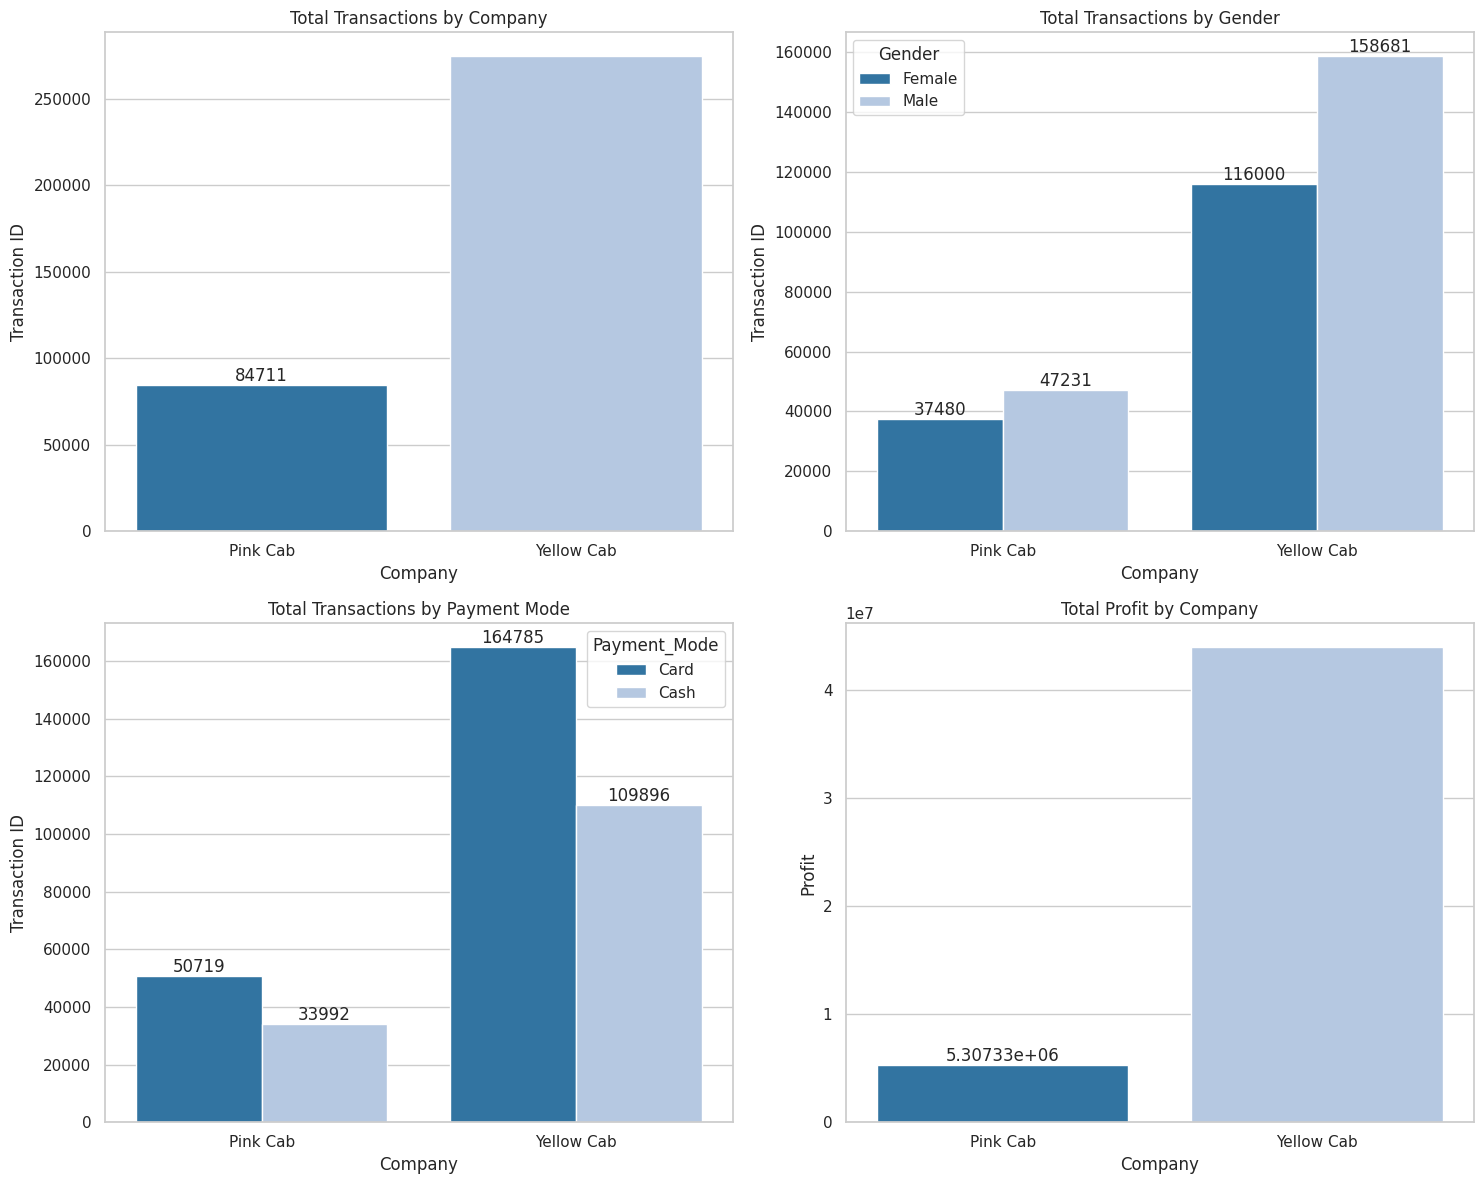

In [52]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")


# Create a large figure to hold all subplots
fig = plt.figure(figsize=(15, 12))

# First subplot - Total Transactions by Company
ax1 = fig.add_subplot(2, 2, 1)
group = merged_df.groupby('Company')['Transaction ID'].count().reset_index()
sns.barplot(data=group, x='Company', y='Transaction ID', palette='tab20', ax=ax1)
ax1.set_title("Total Transactions by Company")
ax1.bar_label(ax1.containers[0])

# Second subplot - Total Transactions by Gender
ax2 = fig.add_subplot(2, 2, 2)
group = merged_df.groupby(['Company', 'Gender'])['Transaction ID'].count().reset_index()
sns.barplot(data=group, x='Company', y='Transaction ID', hue='Gender', palette='tab20', ax=ax2)
ax2.set_title("Total Transactions by Gender")
for container in ax2.containers:
    ax2.bar_label(container)

# Third subplot - Total Transactions by Payment Mode
ax3 = fig.add_subplot(2, 2, 3)
group = merged_df.groupby(['Company', 'Payment_Mode'])['Transaction ID'].count().reset_index()
sns.barplot(data=group, x='Company', y='Transaction ID', hue='Payment_Mode', palette='tab20', ax=ax3)
ax3.set_title("Total Transactions by Payment Mode")
for container in ax3.containers:
    ax3.bar_label(container)

# Fourth subplot - Total Profit by Company
ax4 = fig.add_subplot(2, 2, 4)
group = merged_df.groupby('Company')['Profit'].sum().reset_index()
sns.barplot(data=group, x='Company', y='Profit', palette='tab20', ax=ax4)
ax4.set_title("Total Profit by Company")
ax4.bar_label(ax4.containers[0])

# Adjust layout
plt.tight_layout()
plt.show()


<ipython-input-53-a47f738a45c7>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20')  # Accessing the 'tab20' color map


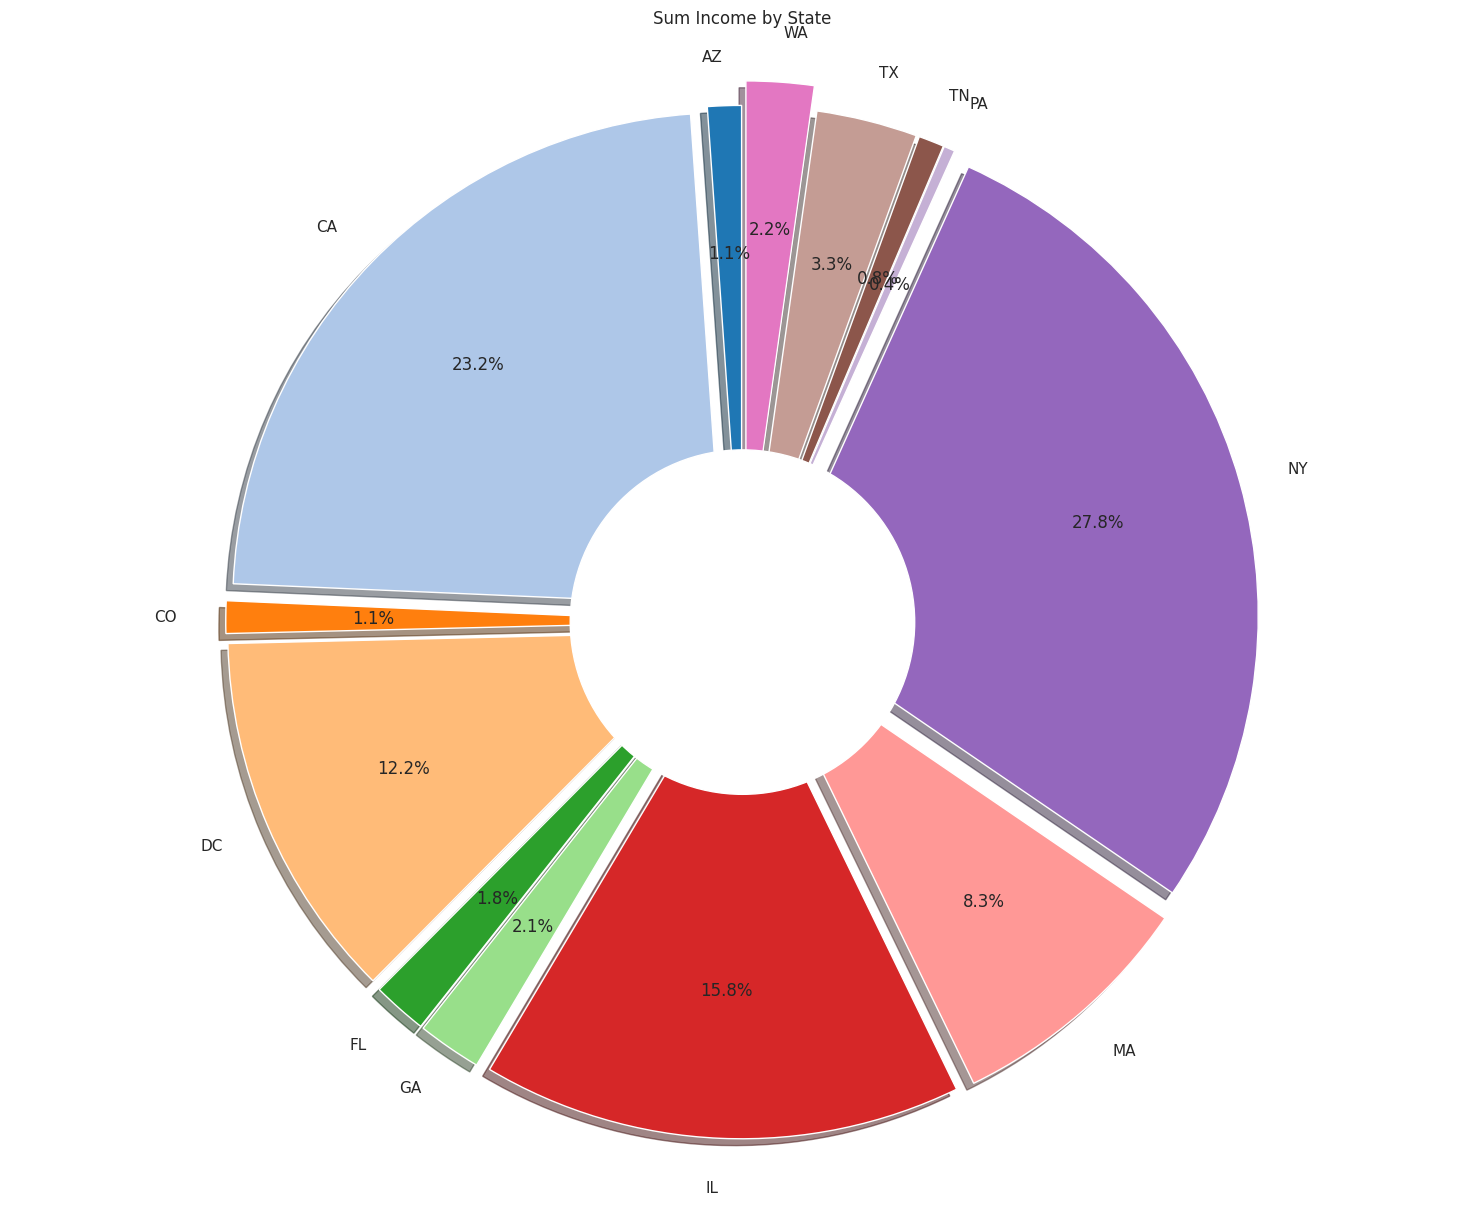

In [53]:
# Assuming 'state_income' DataFrame is already created and contains the required data
fig, ax = plt.subplots(figsize=(15, 12))
state_income = merged_df.groupby('State')['Income (USD/Month)'].count().reset_index()
# Access the 'tab20' color palette
cmap = cm.get_cmap('tab20')  # Accessing the 'tab20' color map
colors = cmap.colors  # Retrieving the colors from this map

# Create a pie chart using the 'tab20' color palette
explodes = [0.1] * len(state_income)  # Create an array for exploding each slice a little
explodes[-1] = 0.2  # Explode the last slice (largest one) a bit more for emphasis
pie_properties = ax.pie(state_income['Income (USD/Month)'], labels=state_income['State'], pctdistance=0.7,
                        autopct='%1.1f%%', colors=colors,  # Applying our color scheme
                        radius=2, explode=explodes, shadow=True, startangle=90)

# Adding a white circle at the center to create a donut chart effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Ensuring the pie is drawn as a circle
ax.axis('equal')

# Apply layout adjustments to make sure everything fits well
plt.tight_layout()

# Set the title of the chart
plt.title("Sum Income by State")

# Display the plot
plt.show()


<ipython-input-54-fdc2dbe40e96>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=group, x='City', y='Income (USD/Month)', palette="tab20")


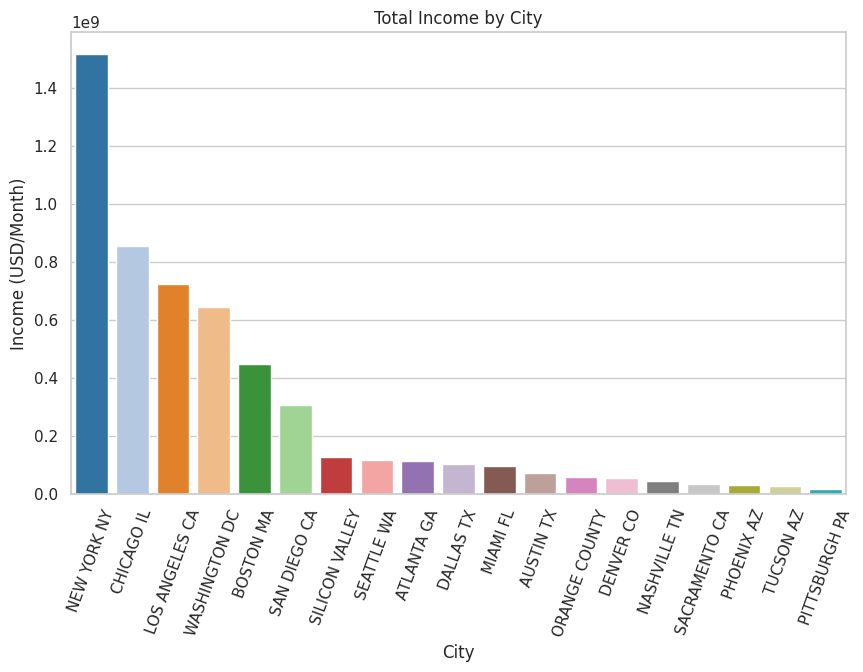

In [54]:


# Create a figure with specified size
fig = plt.figure(figsize=(10, 6))

# Group the data by 'City', sum the incomes, and sort them in descending order
group = merged_df.groupby('City')['Income (USD/Month)'].sum().sort_values(ascending=False).reset_index()

# Create a bar plot using the 'tab20' color palette
ax = sns.barplot(data=group, x='City', y='Income (USD/Month)', palette="tab20")

# Set the title of the plot
plt.title("Total Income by City")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=70)

# Show the plot
plt.show()


<ipython-input-55-fd065c542958>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=population, x='Population',y='City', palette="tab20")


Text(0.5, 1.0, 'Total Population by City')

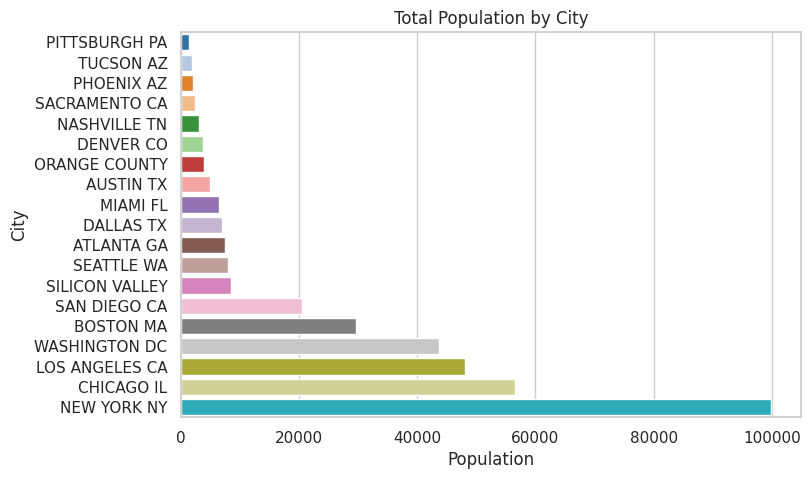

In [55]:
plt.figure(figsize=(8,5))
population=merged_df.groupby("City").agg({"Population":"count"}).sort_values('Population').reset_index()
ax=sns.barplot(data=population, x='Population',y='City', palette="tab20")
plt.title('Total Population by City')


Text(0.5, 1.0, 'Number of Customers in Cities by Company')

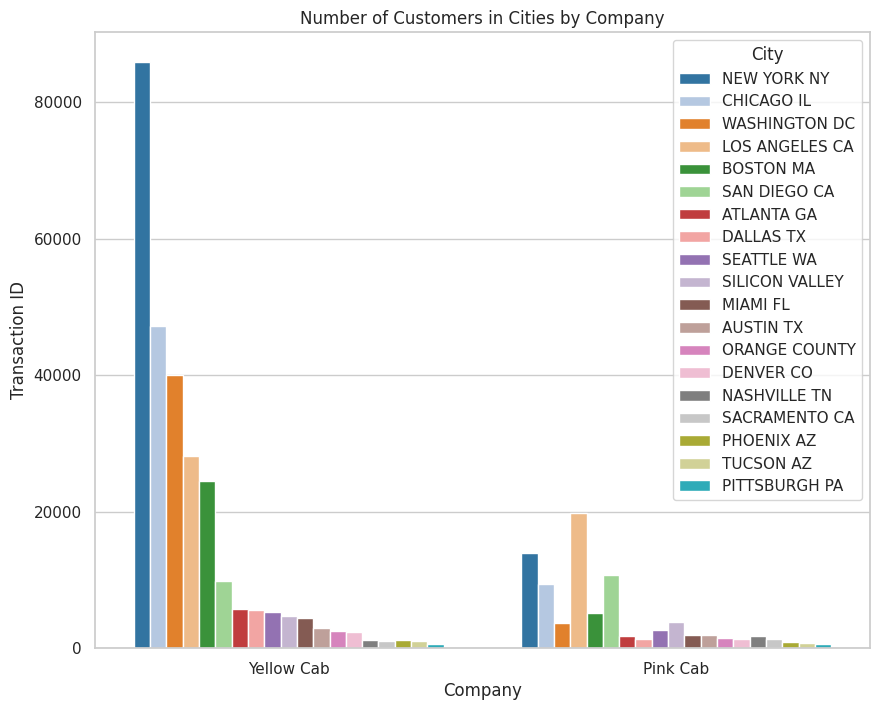

In [56]:
plt.figure(figsize=(10,8))
group = merged_df.groupby(['Company','City'])['Transaction ID'].count().sort_values(ascending=False).reset_index()
ax = sns.barplot(data =group, x="Company", hue="City", y='Transaction ID',palette="tab20")
plt.title("Number of Customers in Cities by Company")

Text(0.5, 1.0, 'KM Travelled by Company')

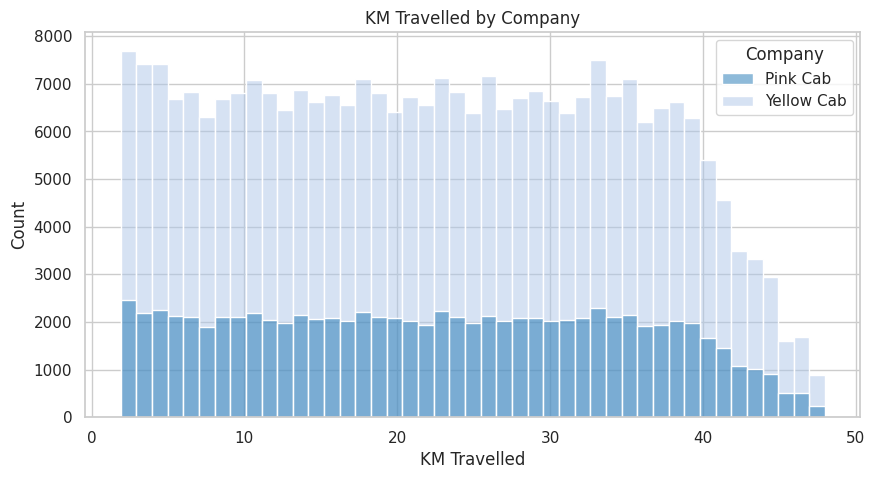

In [57]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data =merged_df, x="KM Travelled", hue="Company",bins=45,palette="tab20")
plt.title("KM Travelled by Company")

In [58]:
x=merged_df.groupby(merged_df['KM Travelled']==5)['Users'].sum().reset_index()
x

KM Travelled        Users
0         False  56860859811
1          True     54463531

Text(0.5, 1.0, 'Profit in Cities by Company')

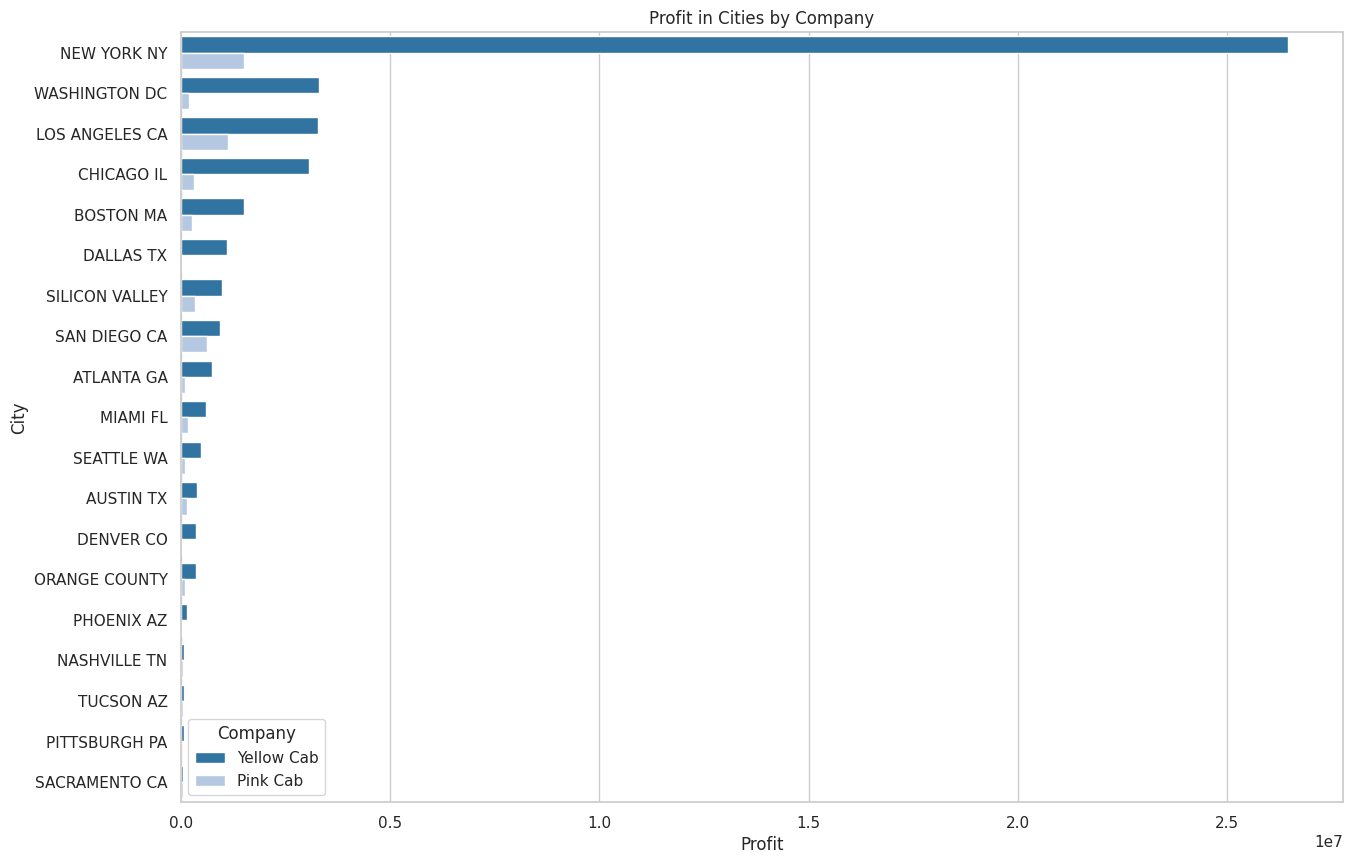

In [59]:
plt.figure(figsize=(15,10))
group = merged_df.groupby(['Company','City'])['Profit'].sum().sort_values(ascending=False).reset_index()
ax = sns.barplot(data =group, x='Profit', y="City", hue="Company",palette="tab20")
plt.title("Profit in Cities by Company")

In [60]:
agg_dict = {
    'Transaction ID': 'count'
}
data_age = merged_df.groupby(['Company', 'Gender']).agg(agg_dict).sort_values(by='Transaction ID').reset_index()
data_age.rename({'Company':'label', 'Gender':'Gender', 'Transaction ID': 'count'}, axis=1, inplace=True)
data_age.head()

label  Gender   count
0    Pink Cab  Female   37480
1    Pink Cab    Male   47231
2  Yellow Cab  Female  116000
3  Yellow Cab    Male  158681

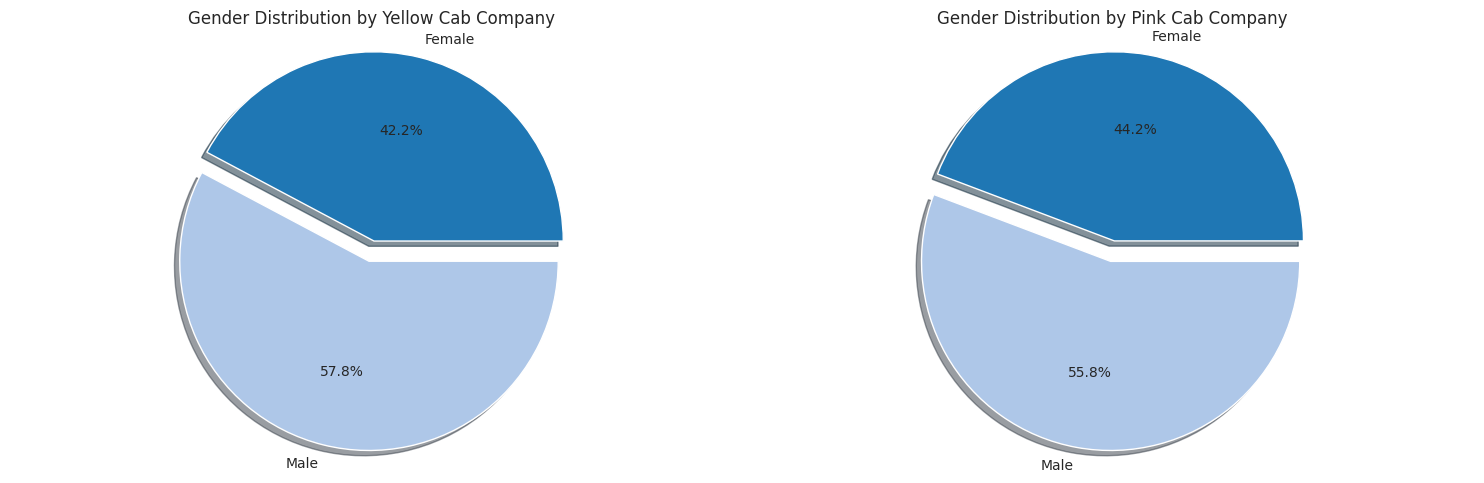

In [61]:
# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Iterate over each company
for i, company in enumerate(['Yellow Cab', 'Pink Cab']):
    # Filter data for the current company
    data = data_age[data_age['label'] == company]

    # Define explode values for pie chart
    explodes = [0.1, 0.01]

    # Plot the pie chart for gender distribution
    axs[i].pie(data['count'], labels=data['Gender'], colors=sns.color_palette("tab20"),
               explode=explodes, autopct='%1.1f%%', shadow=True, textprops={"fontsize": 10})

    # Set title for the pie chart
    axs[i].set_title(f"Gender Distribution by {company} Company", fontsize=12)

    # Set aspect ratio to be equal
    axs[i].axis('equal')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


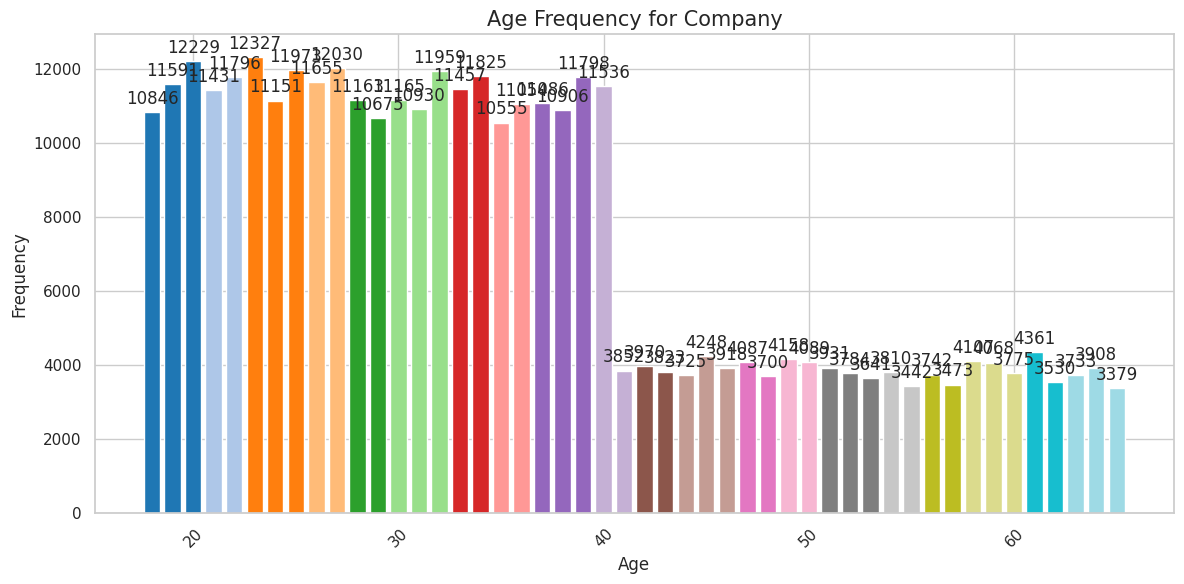

In [62]:
# Calculate age counts from merged_df
age_counts = merged_df['Age'].value_counts().sort_index()

# Set up the figure
fig, ax = plt.subplots(figsize=(12, 6))

# Define the tab20 color palette
cmap = plt.get_cmap('tab20')
colors = cmap(np.linspace(0, 1, len(age_counts)))

# Create the bar plot
bars = ax.bar(age_counts.index, age_counts.values, color=colors)

# Set the title and labels
ax.set_title('Age Frequency for Company', fontsize=15)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# Rotate x-axis labels if necessary
plt.xticks(rotation=45)

# Adding values on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()


<ipython-input-63-4ec6b1e5f110>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax=sns.lineplot(data=merged_df, x='Year', y='Transaction ID', marker='o',palette="tab20")
<ipython-input-63-4ec6b1e5f110>:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax=sns.lineplot(data=merged_df, x='Month', y='Transaction ID', marker='o',palette="tab20")


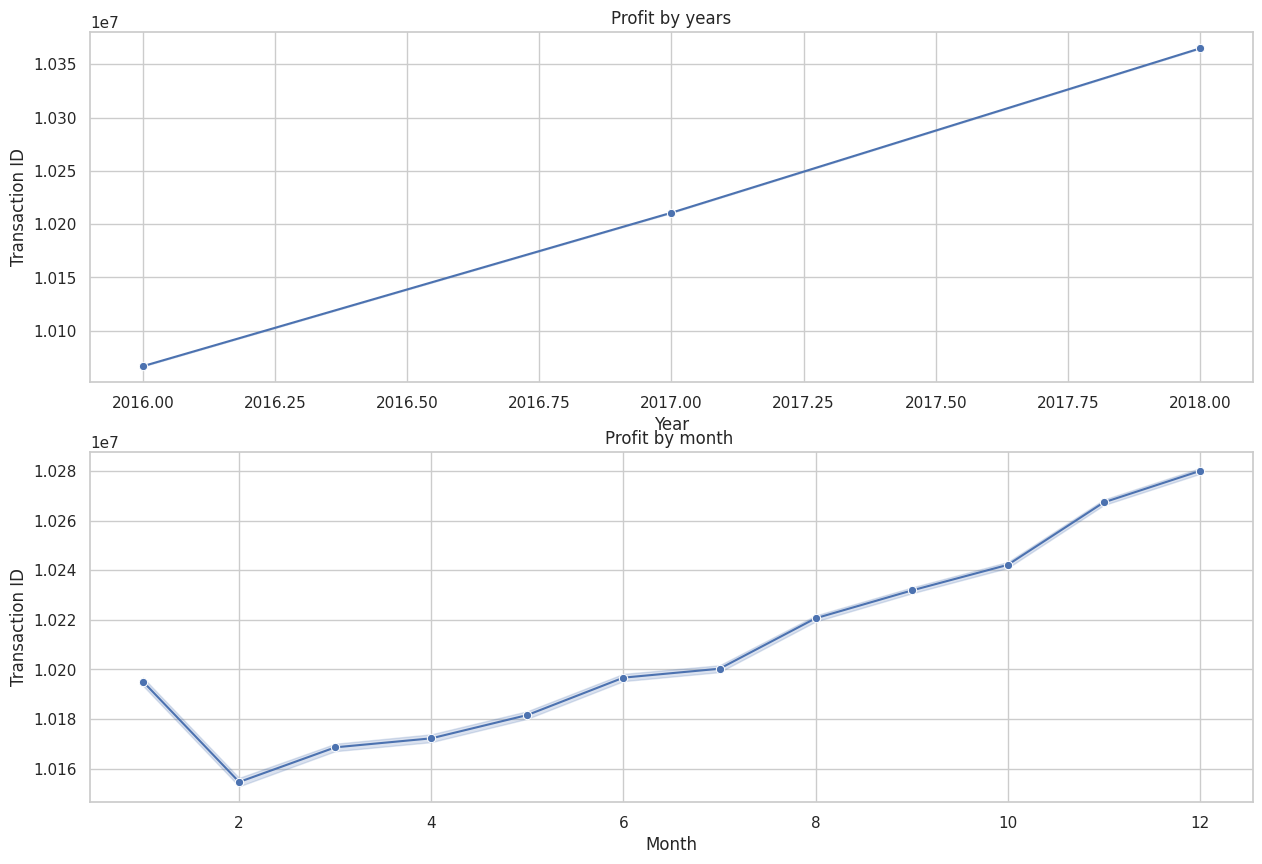

In [63]:
#Examination of the data set in monthly and annual periods
fig=plt.figure(figsize=(15,10))

fig.add_subplot(2,1,1)
merged_df["Year"] = merged_df["Date of Travel"].apply(lambda x: x.year)
plt.title("Profit by years")
group = merged_df.groupby(merged_df['Company']=='Pink Cab')['Transaction ID'].count().sort_values(ascending=False).reset_index()
ax=sns.lineplot(data=merged_df, x='Year', y='Transaction ID', marker='o',palette="tab20")
#ax = sns.barplot(data =group, x=all_data["Year"], y='Transaction ID',palette="rocket_r")

fig.add_subplot(2,1,2)
merged_df["Month"] = merged_df["Date of Travel"].apply(lambda x: x.month)
plt.title("Profit by month ")
group =merged_df.groupby(merged_df['Company']=='Pink Cab')['Transaction ID'].count().sort_values(ascending=False).reset_index()
ax=sns.lineplot(data=merged_df, x='Month', y='Transaction ID', marker='o',palette="tab20")
#ax = sns.barplot(data =group, x=all_data["Year"], y='Transaction ID',palette="rocket_r")

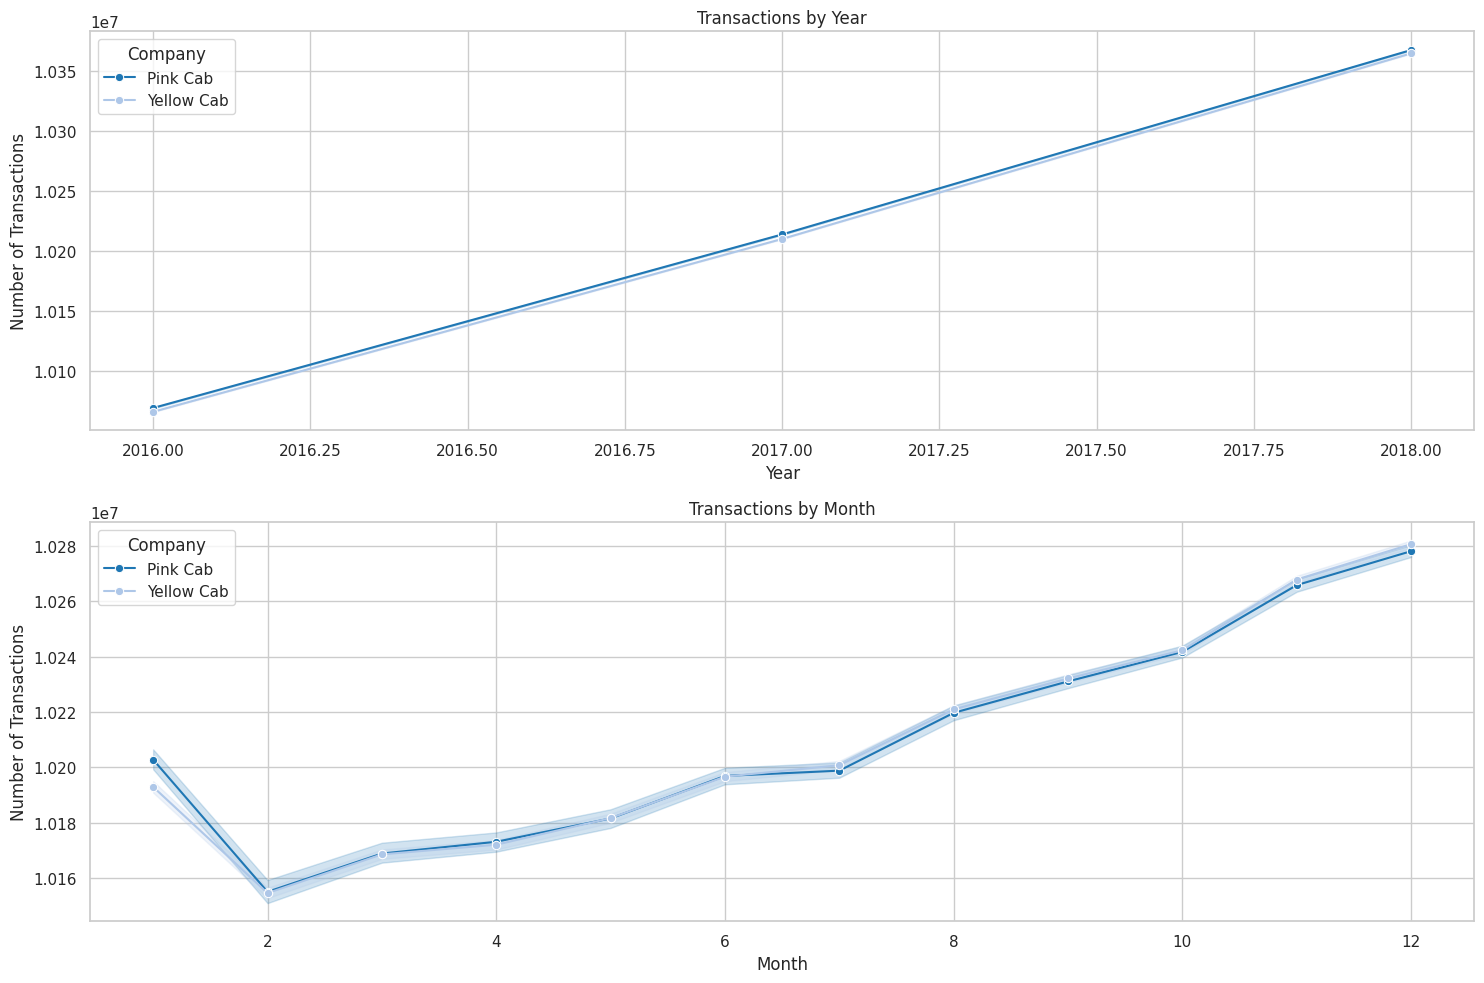

In [64]:
# Ensure 'Date of Travel' is in datetime format
merged_df['Date of Travel'] = pd.to_datetime(merged_df['Date of Travel'])

# Extract 'Year' and 'Month' from 'Date of Travel'
merged_df["Year"] = merged_df["Date of Travel"].dt.year
merged_df["Month"] = merged_df["Date of Travel"].dt.month

# Define the figure
fig = plt.figure(figsize=(15, 10))

# First subplot: Transactions by Year
ax1 = fig.add_subplot(2, 1, 1)
sns.lineplot(data=merged_df, x='Year', y='Transaction ID', hue='Company', marker='o', palette="tab20", ax=ax1)
ax1.set_title("Transactions by Year")
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Transactions')

# Second subplot: Transactions by Month
ax2 = fig.add_subplot(2, 1, 2)
sns.lineplot(data=merged_df, x='Month', y='Transaction ID', hue='Company', marker='o', palette="tab20", ax=ax2)
ax2.set_title("Transactions by Month")
ax2.set_xlabel('Month')
ax2.set_ylabel('Number of Transactions')

# Adjust layout and show plot
plt.tight_layout()
plt.show()



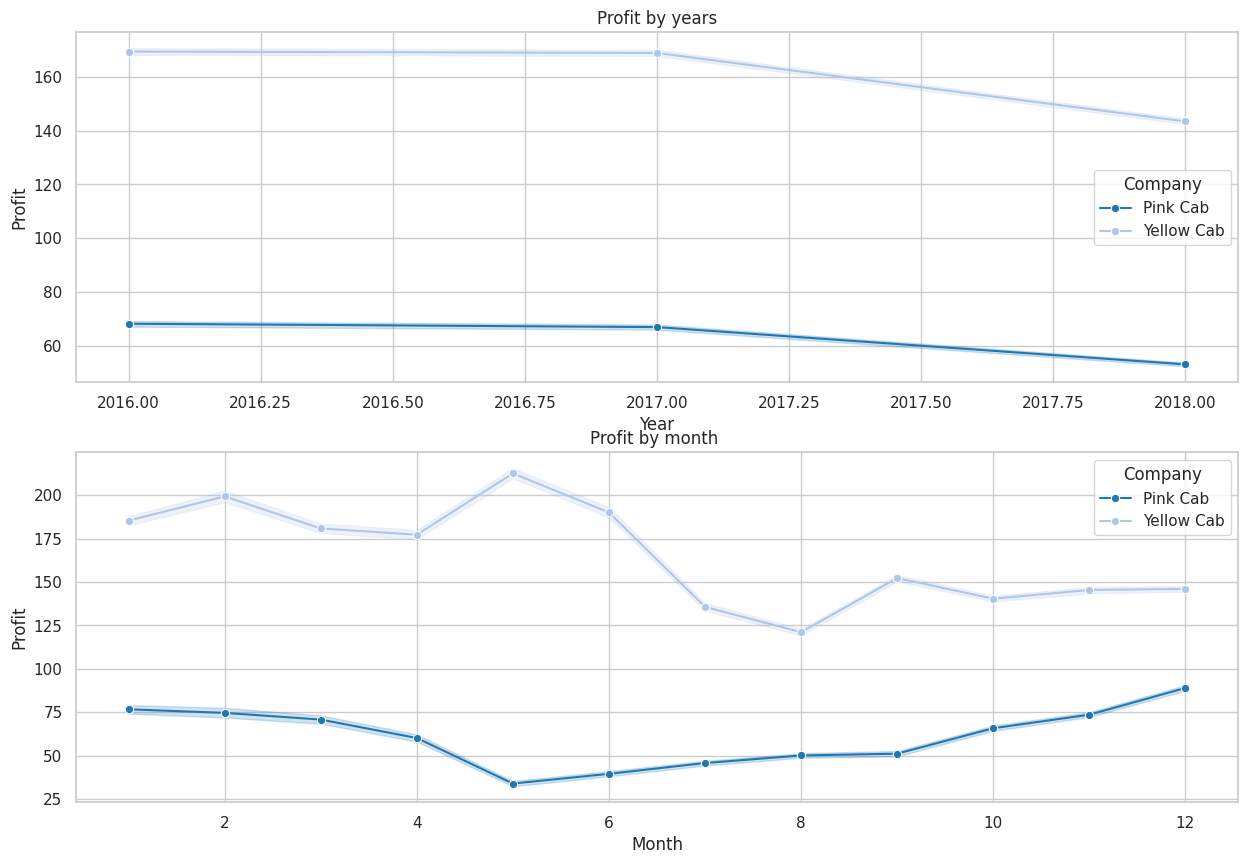

In [65]:
#Examination of the data set in monthly and annual periods
fig=plt.figure(figsize=(15,10))

fig.add_subplot(2,1,1)
merged_df["Year"] = merged_df["Date of Travel"].apply(lambda x: x.year)
plt.title("Profit by years")

ax=sns.lineplot(data=merged_df, x='Year', y='Profit', hue="Company", marker='o',palette="tab20")


fig.add_subplot(2,1,2)
merged_df["Month"] = merged_df["Date of Travel"].apply(lambda x: x.month)
plt.title("Profit by month ")

ax=sns.lineplot(data=merged_df, x='Month', y='Profit', hue="Company", marker='o',palette="tab20")


<Axes: xlabel='Month', ylabel='Customer ID'>

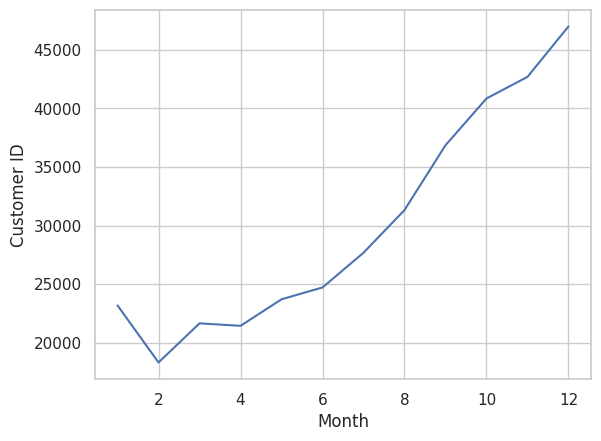

In [66]:
group =merged_df.groupby('Month')['Customer ID'].count().reset_index()
sns.lineplot(data=group, x='Month',y='Customer ID')

<Axes: xlabel='Day', ylabel='Customer ID'>

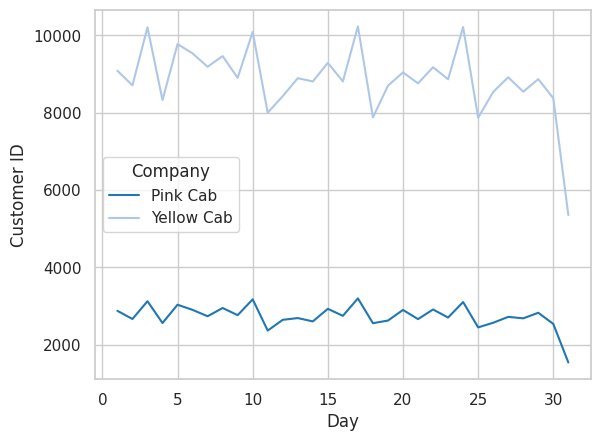

In [67]:
#Data of Travel
merged_df["Day"] = merged_df["Date of Travel"].apply(lambda x: x.day)
group = merged_df.groupby(['Day','Company'])['Customer ID'].count().reset_index()
sns.lineplot(data=group, x='Day',y='Customer ID', hue='Company', palette="tab20")

Text(0.5, 1.0, 'Age Distribution by Company')

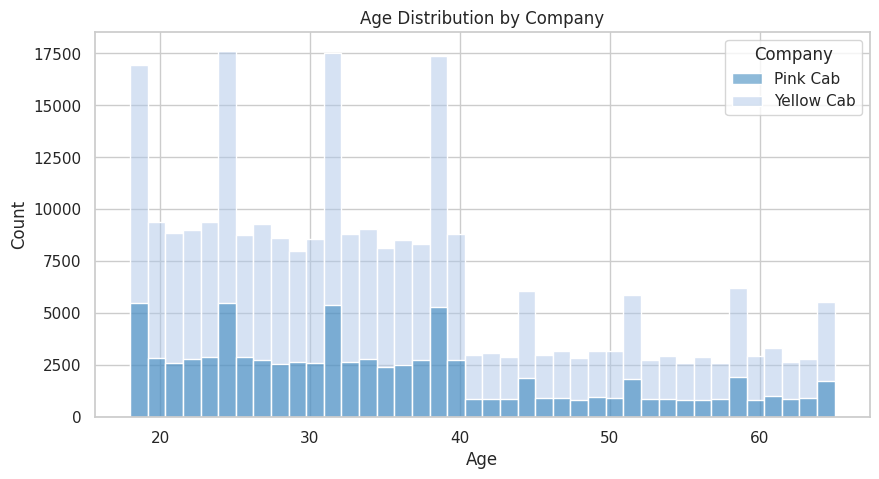

In [68]:
plt.figure(figsize=(10,5))

sns.histplot(data =merged_df, x="Age", hue="Company", bins=40, palette="tab20")
plt.title("Age Distribution by Company")


In [69]:


def calculate_average_profit_per_km(df):
    """
    Calculate the average profit per kilometer traveled for each company by year.

    Parameters:
    df (DataFrame): The input DataFrame containing columns 'Company', 'Year', 'Profit', and 'KM Travelled'.

    Returns:
    DataFrame: A DataFrame with average profit per kilometer by company and year.
    """

    df['Date of Travel'] = pd.to_datetime(df['Date of Travel'])


    df['Year'] = df['Date of Travel'].dt.year

    # Calculate total profit and total KM travelled by Company and Year
    total_profit = df.groupby(['Company', 'Year'])['Profit'].sum().reset_index()
    total_km = df.groupby(['Company', 'Year'])['KM Travelled'].sum().reset_index()

    # Calculate average profit per KM
    avg_profit_per_km = total_profit['Profit'] / total_km['KM Travelled']

    # Create DataFrame for the results
    result = pd.DataFrame(avg_profit_per_km, columns=['Profit'])
    result['Year'] = total_profit['Year']
    result['Company'] = total_profit['Company']

    # Group the result by Company and Year
    grouped_result = result.groupby(['Company', 'Year'])['Profit'].sum().reset_index()

    return grouped_result


group = calculate_average_profit_per_km(merged_df)
display(group)


Company  Year    Profit
0    Pink Cab  2016  3.040784
1    Pink Cab  2017  2.965274
2    Pink Cab  2018  2.357667
3  Yellow Cab  2016  7.487720
4  Yellow Cab  2017  7.483920
5  Yellow Cab  2018  6.362446

In [70]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Customer ID         359392 non-null  int64         
 2   Payment_Mode        359392 non-null  object        
 3   Date of Travel      359392 non-null  datetime64[ns]
 4   Company             359392 non-null  object        
 5   City                359392 non-null  object        
 6   KM Travelled        359392 non-null  float64       
 7   Price Charged       359392 non-null  float64       
 8   Cost of Trip        359392 non-null  float64       
 9   Profit              359392 non-null  float64       
 10  State               359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392 no

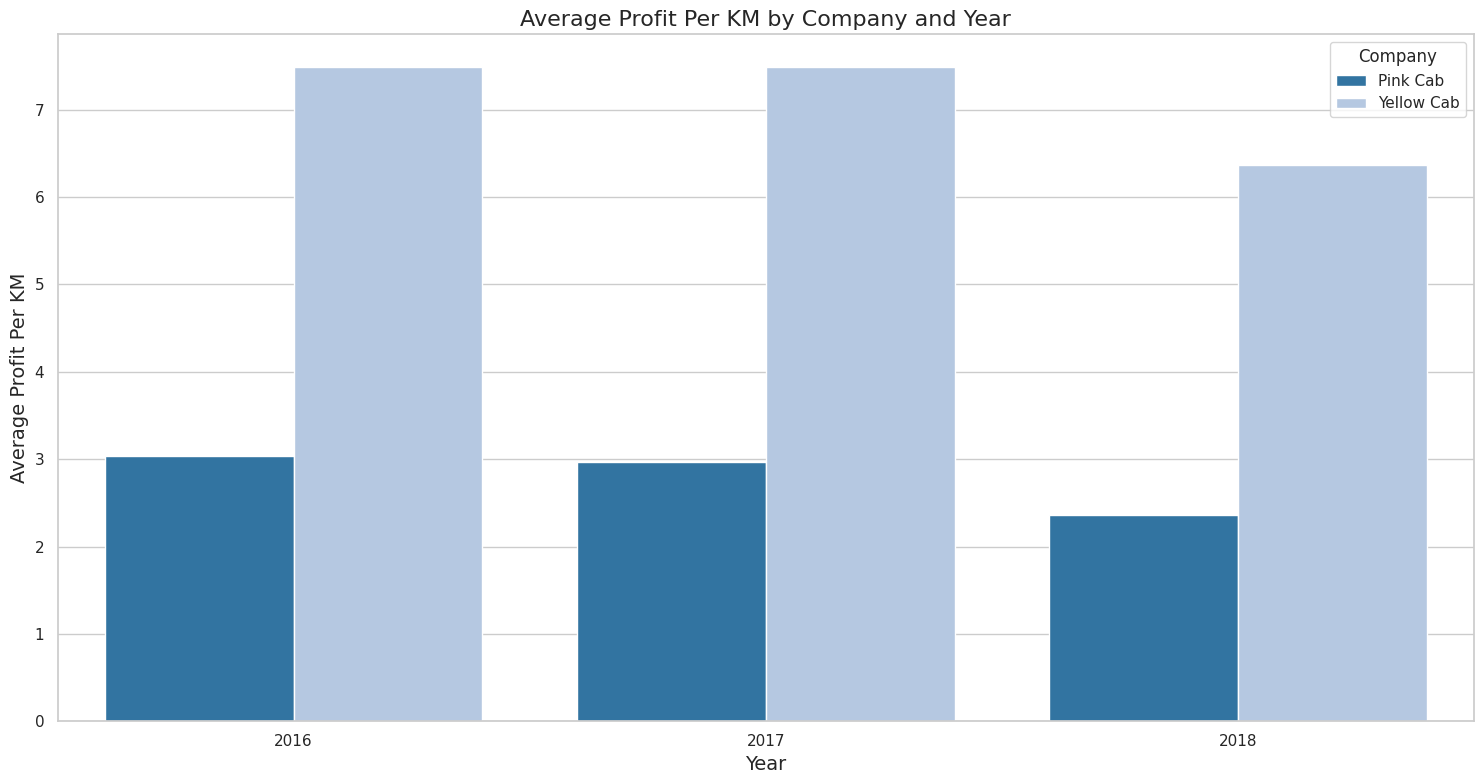

In [71]:


def plot_average_profit_per_km_bar(group):
    """
    Plot the average profit per kilometer for each company by year as a bar chart.

    Parameters:
    group (DataFrame): The DataFrame containing columns 'Company', 'Year', and 'Profit'.
    """
    # Define the figure
    plt.figure(figsize=(15, 8))

    # Create the bar plot
    sns.barplot(data=group, x='Year', y='Profit', hue='Company', palette='tab20')

    # Set the title and labels
    plt.title('Average Profit Per KM by Company and Year', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Average Profit Per KM', fontsize=14)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage of the plotting function
plot_average_profit_per_km_bar(group)


In [72]:
def calculate_total_profit_by_year(df):
    """
    Calculate the total profit for each company by year.

    Parameters:
    df (DataFrame): The input DataFrame containing columns 'Company', 'Year', 'Profit'.

    Returns:
    DataFrame: A DataFrame with total profit by company and year.
    """
    # Calculate total profit by Company and Year
    total_profit = df.groupby(['Company', 'Year'])['Profit'].sum().reset_index()

    return total_profit

def ensure_all_years(data, start_year, end_year):
    """
    Ensure all years are present in the DataFrame for each company.

    Parameters:
    data (DataFrame): The DataFrame containing columns 'Company', 'Year', and 'Profit'.
    start_year (int): The starting year.
    end_year (int): The ending year.

    Returns:
    DataFrame: The DataFrame with all years included.
    """
    all_years = pd.DataFrame({
        'Year': np.arange(start_year, end_year + 1)
    })

    companies = data['Company'].unique()
    expanded_data = pd.DataFrame()

    for company in companies:
        company_data = data[data['Company'] == company]
        company_years = all_years.merge(company_data, on='Year', how='left')
        company_years['Company'] = company
        expanded_data = pd.concat([expanded_data, company_years], ignore_index=True)

    #expanded_data['Profit'].fillna(0, inplace=True)
    return expanded_data


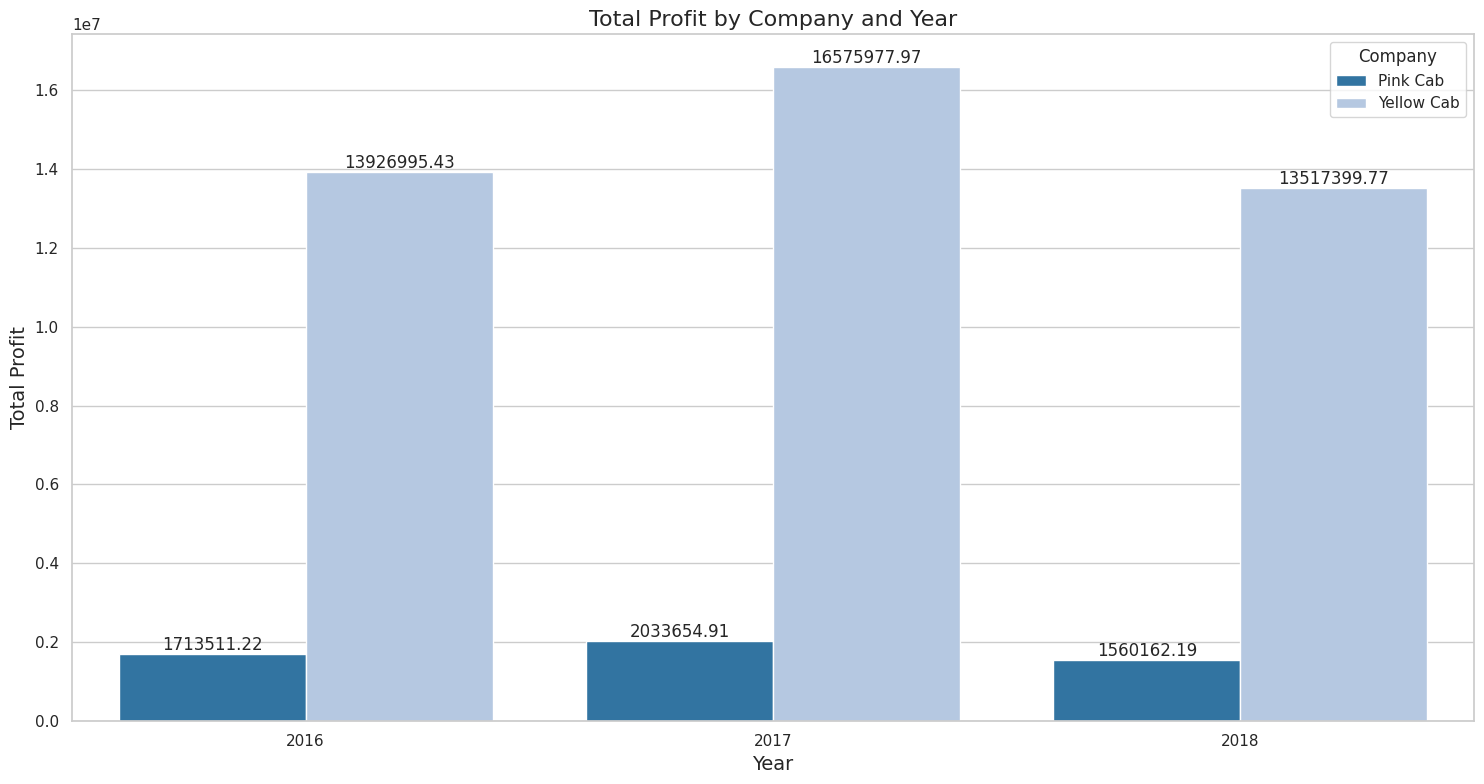

In [73]:
def plot_total_profit_by_year_bar(df):
    """
    Plot the total profit for each company by year as a bar chart, including numeric labels on bars.

    Parameters:
    df (DataFrame): The DataFrame containing columns 'Company', 'Year', and 'Profit'.
    """
    # Ensure all years are included
    start_year = int(df['Year'].min())
    end_year = int(df['Year'].max())
    df = ensure_all_years(df, start_year, end_year)

    # Define the figure
    plt.figure(figsize=(15, 8))

    # Create the bar plot
    ax = sns.barplot(data=df, x='Year', y='Profit', hue='Company', palette='tab20')

    # Add numeric labels on the bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge')

    # Set the title and labels
    plt.title('Total Profit by Company and Year', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Total Profit', fontsize=14)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage of the functions
total_profit_by_year = calculate_total_profit_by_year(merged_df)
plot_total_profit_by_year_bar(total_profit_by_year)


In [74]:
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Customer ID         359392 non-null  int64         
 2   Payment_Mode        359392 non-null  object        
 3   Date of Travel      359392 non-null  datetime64[ns]
 4   Company             359392 non-null  object        
 5   City                359392 non-null  object        
 6   KM Travelled        359392 non-null  float64       
 7   Price Charged       359392 non-null  float64       
 8   Cost of Trip        359392 non-null  float64       
 9   Profit              359392 non-null  float64       
 10  State               359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392 no

In [75]:
# Ensure 'Year' column is present and correctly formatted
if 'Year' in merged_df.columns:
    unique_years = merged_df['Year'].unique()
    unique_years_sorted = np.sort(unique_years)
    print("Unique Years in the DataFrame:", unique_years_sorted)
else:
    print("'Year' column not found in the DataFrame.")


Unique Years in the DataFrame: [2016 2017 2018]


<ipython-input-76-4b39249ee519>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar1 = sns.barplot(x="City", y='Profit', data=total, palette='tab20')
<ipython-input-76-4b39249ee519>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar2 = sns.barplot(x="City", y="Profit", data=company, palette='tab20')


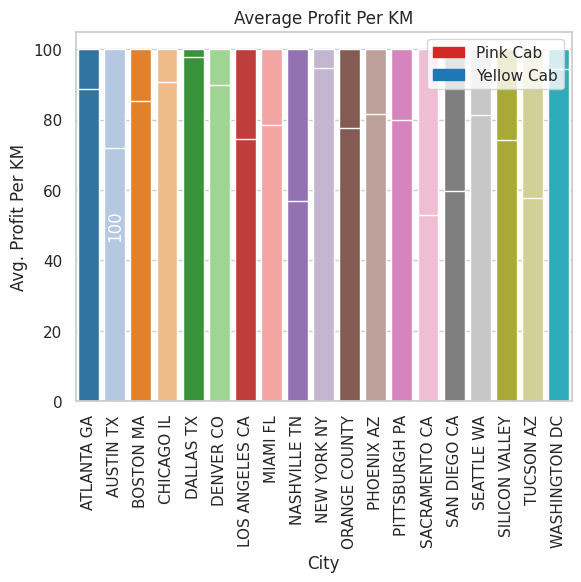

In [76]:
fig, ax = plt.subplots()

total = merged_df.groupby('City')['Profit'].sum().reset_index()
company = merged_df[merged_df.Company=='Yellow Cab'].groupby('City')['Profit'].sum().reset_index()
company['Profit'] = [i / j * 100 for i,j in zip(company['Profit'], total['Profit'])]
total['Profit'] = [i / j * 100 for i,j in zip(total['Profit'], total['Profit'])]

# Top bars (group of 'Company')
bar1 = sns.barplot(x="City", y='Profit', data=total, palette='tab20')

# Bottom bars (group of 'Company=Yellow Cab')
bar2 = sns.barplot(x="City", y="Profit", data=company, palette='tab20')

# Add legend
top_bar = mpatches.Patch(color=sns.color_palette('tab20')[6], label='Pink Cab')
bottom_bar = mpatches.Patch(color=sns.color_palette('tab20')[0], label='Yellow Cab')
plt.legend(handles=[top_bar, bottom_bar])

# Add labels
bar2.bar_label(bar2.containers[1], label_type='center', rotation=90, color='white')

plt.ylabel("Avg. Profit Per KM")
plt.title("Average Profit Per KM")
plt.xticks(rotation=90)

# Show the graph
plt.show()


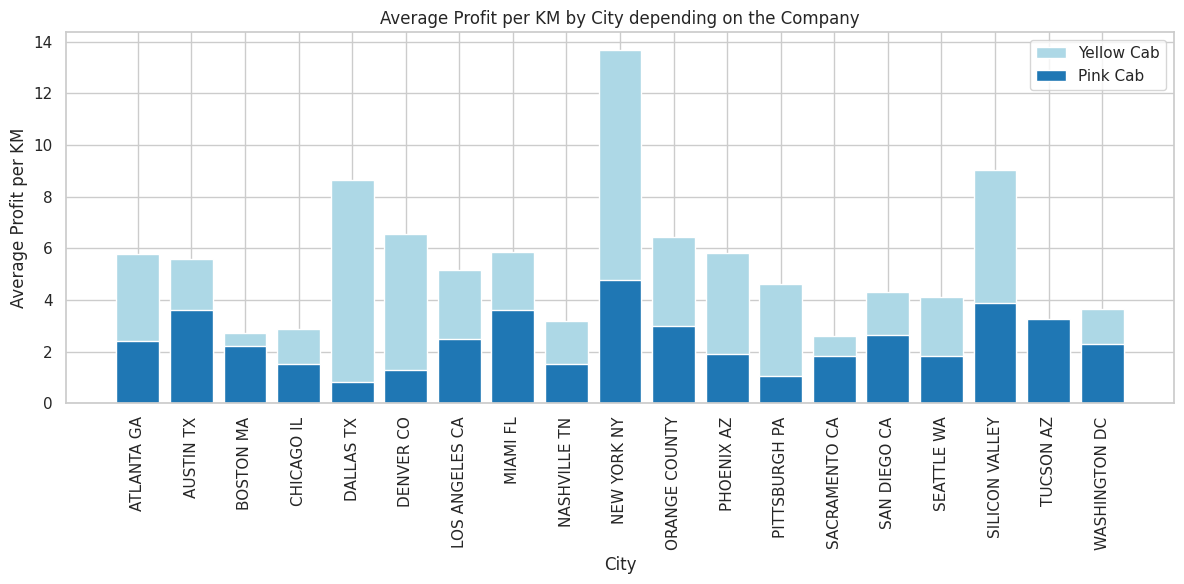

In [77]:
# Recalculate the average profit per kilometer
merged_df['Avg_Profit_Per_KM'] = merged_df['Profit'] / merged_df['KM Travelled']

# Group the data by company and city, then calculate the mean average profit per kilometer
grouped_df = merged_df.groupby(['Company', 'City'])['Avg_Profit_Per_KM'].mean().reset_index()

# Split the data into two separate dataframes for each company
yellow_cab_df = grouped_df[grouped_df['Company'] == 'Yellow Cab']
pink_cab_df = grouped_df[grouped_df['Company'] == 'Pink Cab']

# Create a bar chart
plt.figure(figsize=(12, 6))

# For Yellow Cab
plt.bar(yellow_cab_df['City'], yellow_cab_df['Avg_Profit_Per_KM'], color='lightblue', label='Yellow Cab')

# For Pink Cab
plt.bar(pink_cab_df['City'], pink_cab_df['Avg_Profit_Per_KM'], color='tab:blue', label='Pink Cab')

plt.xlabel('City')
plt.ylabel('Average Profit per KM')
plt.title('Average Profit per KM by City depending on the Company')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()


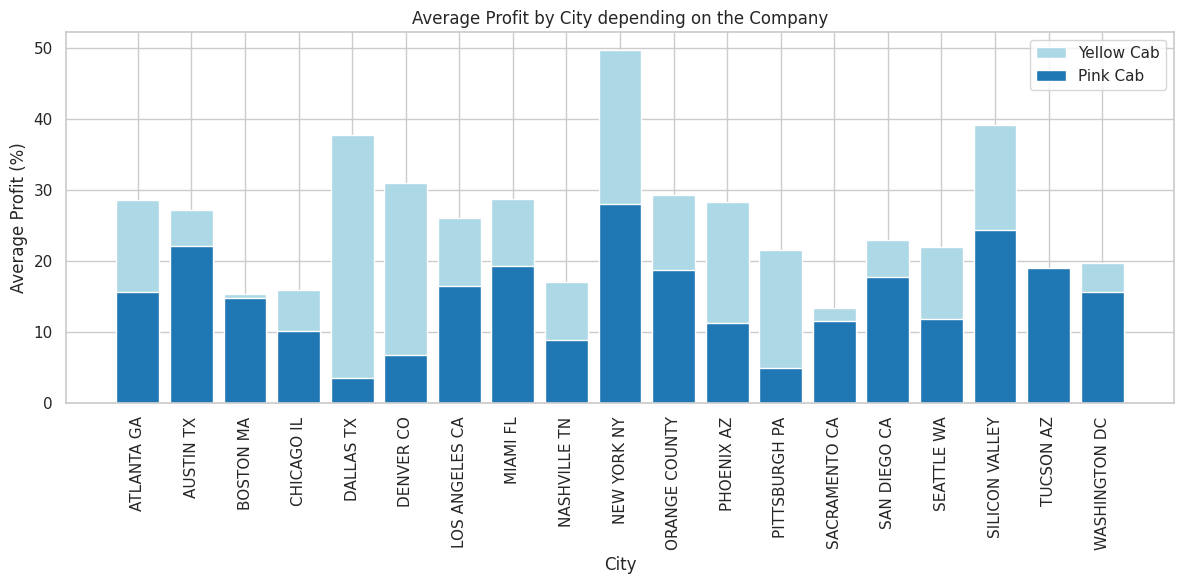

In [78]:
# Recalculate the profit percentage
merged_df['Profit_Percentage'] = (merged_df['Profit'] / merged_df['Price Charged']) * 100

# Group the data by company and city, then calculate the mean profit percentage
grouped_df = merged_df.groupby(['Company', 'City'])['Profit_Percentage'].mean().reset_index()

# Split the data into two separate dataframes for each company
yellow_cab_df = grouped_df[grouped_df['Company'] == 'Yellow Cab']
pink_cab_df = grouped_df[grouped_df['Company'] == 'Pink Cab']

# Create a bar chart
plt.figure(figsize=(12, 6))

# For Yellow Cab
plt.bar(yellow_cab_df['City'], yellow_cab_df['Profit_Percentage'], color='lightblue', label='Yellow Cab')

# For Pink Cab
plt.bar(pink_cab_df['City'], pink_cab_df['Profit_Percentage'], color='tab:blue', label='Pink Cab')

plt.xlabel('City')
plt.ylabel('Average Profit (%)')
plt.title('Average Profit by City depending on the Company')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()


interval columns not set, guessing: ['Transaction ID', 'Customer ID', 'KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit', 'Age', 'Income (USD/Month)', 'Population', 'Users', 'Year', 'Month', 'Day', 'Avg_Profit_Per_KM', 'Profit_Percentage']


/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable Date of Travel is large: 1095. Are you sure this is not an interval variable? Analysis for pairs of variables including Date of Travel can be slow.
  warnings.warn(


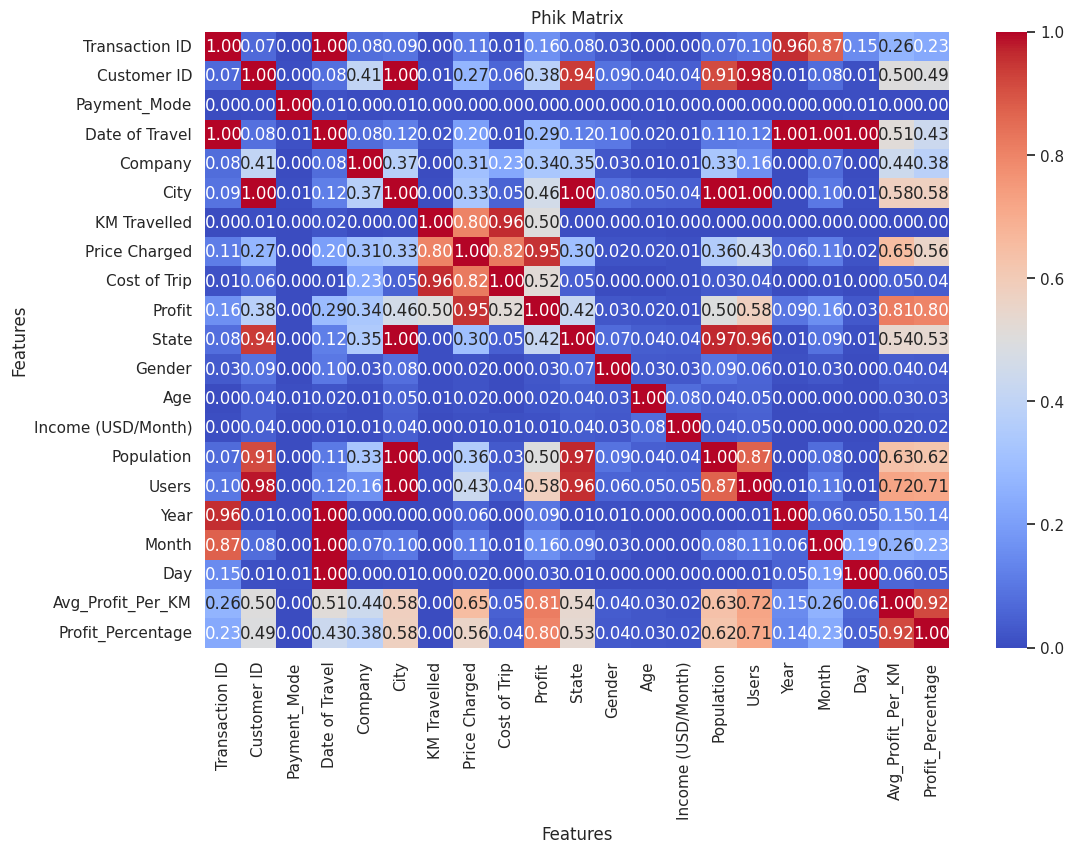

In [79]:
# Compute the Phik matrix
phik_matrix = merged_df.phik_matrix()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Phik Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [80]:
# Extract the row or column corresponding to 'Profit'
profit_correlation = phik_matrix['Profit']

# Sort the correlation values in ascending order
sorted_correlation = profit_correlation.sort_values()

# Print the sorted correlation values
print("Correlation of Profit with Other Columns (Sorted in Ascending Order):")
print(sorted_correlation)

Correlation of Profit with Other Columns (Sorted in Ascending Order):
Payment_Mode          0.000000
Income (USD/Month)    0.013315
Age                   0.020948
Gender                0.026310
Day                   0.027735
Year                  0.094828
Month                 0.158766
Transaction ID        0.161791
Date of Travel        0.291369
Company               0.335906
Customer ID           0.377628
State                 0.419835
City                  0.458861
Population            0.496163
KM Travelled          0.500562
Cost of Trip          0.518938
Users                 0.581779
Profit_Percentage     0.798361
Avg_Profit_Per_KM     0.813103
Price Charged         0.951922
Profit                1.000000
Name: Profit, dtype: float64


interval columns not set, guessing: ['Transaction ID', 'Customer ID', 'KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit', 'Age', 'Income (USD/Month)', 'Population', 'Users', 'Year', 'Month', 'Day', 'Avg_Profit_Per_KM', 'Profit_Percentage']


/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable Date of Travel is large: 1095. Are you sure this is not an interval variable? Analysis for pairs of variables including Date of Travel can be slow.
  warnings.warn(


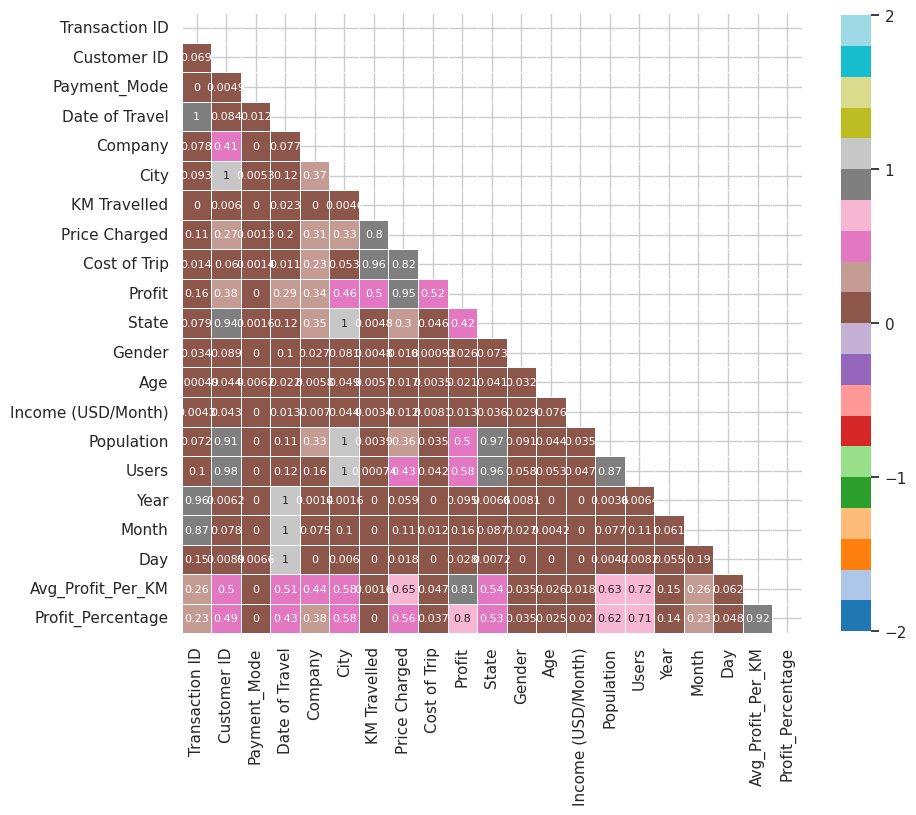

In [81]:
# Compute the Phik matrix
phik_matrix = merged_df.phik_matrix()

# Create a mask for the upper triangle
mask = np.zeros_like(phik_matrix)
mask[np.triu_indices_from(mask)] = True

# Create a figure and axis
f, ax = plt.subplots(figsize=(10, 10))

# Create the heatmap
heatmap = sns.heatmap(phik_matrix, mask=mask,
                      square=True,
                      linewidths=.5,
                      cmap="tab20",
                      cbar_kws={'shrink': .8, "ticks": [-2, -1, 0, 1, 2]},
                      vmin=-2,
                      vmax=2,
                      annot=True,
                      annot_kws={"size": 8})

# Add the column names as labels
ax.set_yticklabels(phik_matrix.columns)
ax.set_xticklabels(phik_matrix.columns)

# Set style
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

plt.show()


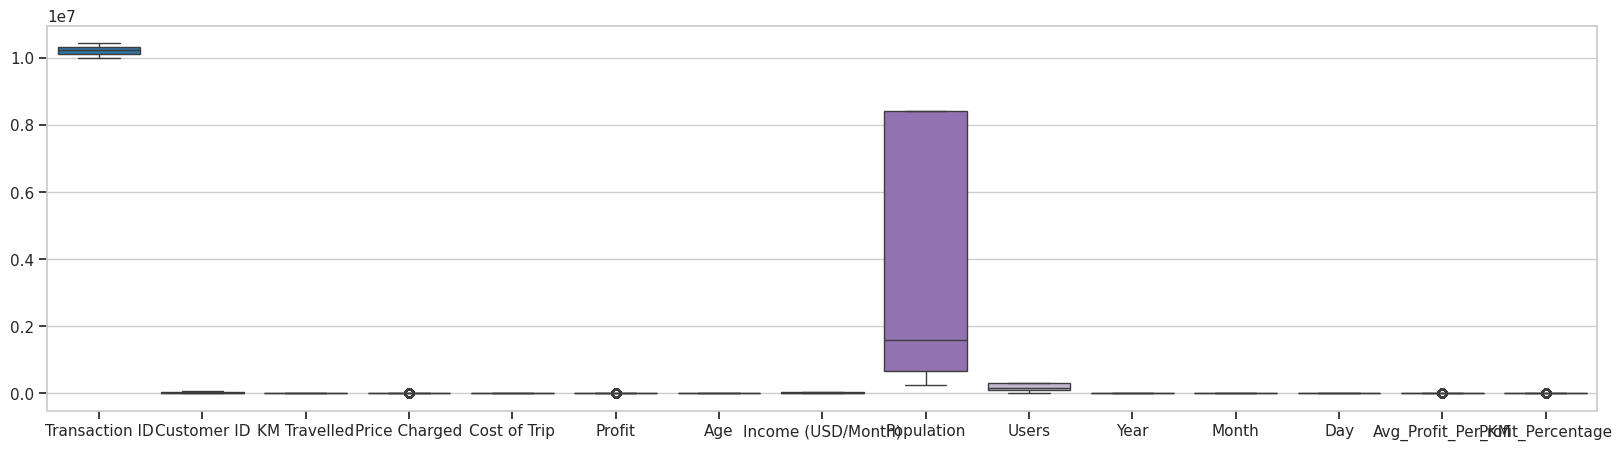

In [82]:
#outliers values
plt.figure(figsize=(20,5))
sns.boxplot(data = merged_df, palette='tab20')
plt.show()

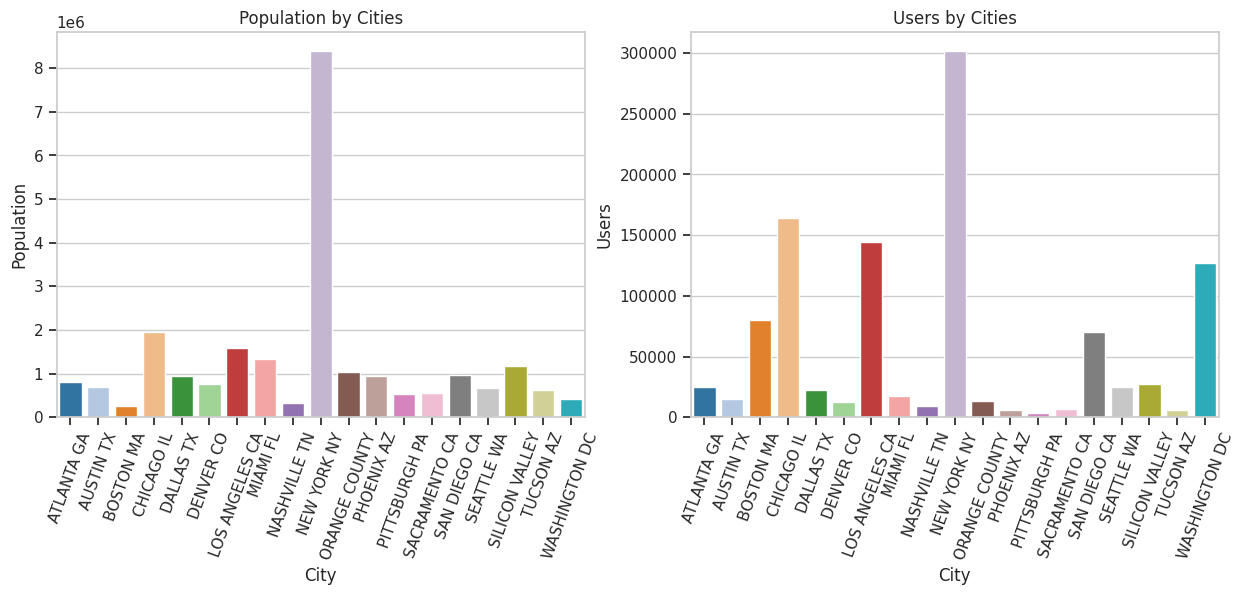

In [83]:
# Population and Users Comparison by Cities
fig=plt.figure(figsize=(15,5))

fig.add_subplot(1,2,1)
sns.barplot(x="City", y="Population", data=merged_df, palette="tab20", hue="City", legend=False)
plt.xticks(rotation=70)
plt.title("Population by Cities")

fig.add_subplot(1,2,2)
sns.barplot(x="City", y="Users", data=merged_df, palette="tab20", hue="City", legend=False)
plt.xticks(rotation=70)
plt.title("Users by Cities")

plt.show()


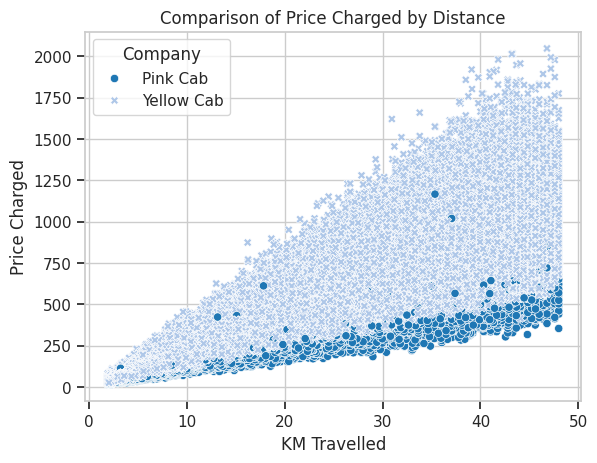

In [84]:
sns.scatterplot(data=merged_df, x='KM Travelled', y='Price Charged',
                hue='Company',
                style='Company',
                palette='tab20')
plt.title('Comparison of Price Charged by Distance')

plt.show()

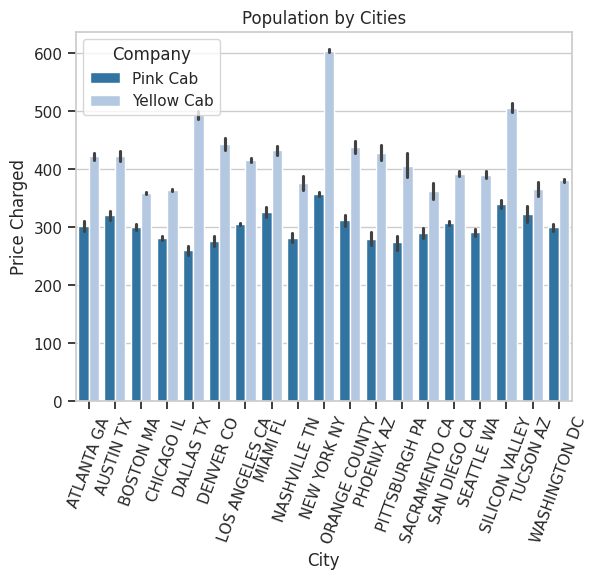

In [85]:
sns.barplot(x="City", y="Price Charged", hue='Company', data=merged_df, palette="tab20")
plt.xticks(rotation=70)
plt.title("Population by Cities")

plt.show()

<Figure size 1000x500 with 0 Axes>

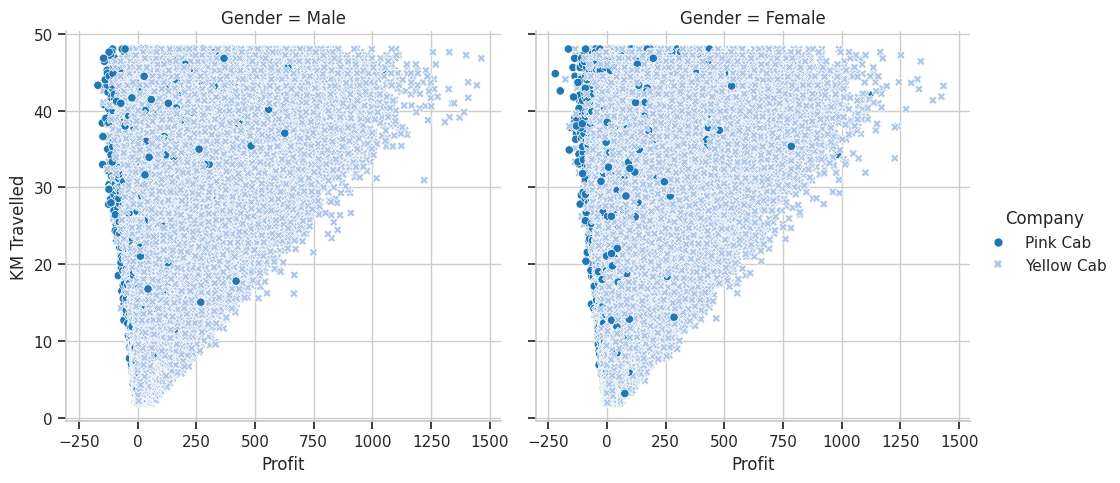

In [86]:
plt.figure(figsize = (10, 5))
sns.relplot(
    data=merged_df, x="Profit", y="KM Travelled",
    col="Gender", hue="Company", style="Company",
    palette='tab20',
    kind="scatter"
)

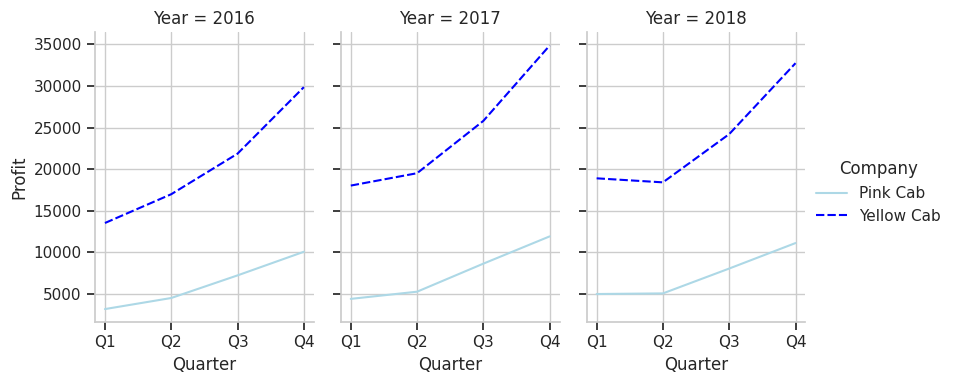

In [87]:
# Define quarters based on month
merged_df.loc[merged_df['Month'] >= 1, 'Quarter'] = 'Q1'
merged_df.loc[merged_df['Month'] > 3, 'Quarter'] = 'Q2'
merged_df.loc[merged_df['Month'] > 6, 'Quarter'] = 'Q3'
merged_df.loc[merged_df['Month'] > 9, 'Quarter'] = 'Q4'

# Group by Quarter, Company, and Year, count the profits
group = merged_df.groupby(['Quarter', 'Company', 'Year'])['Profit'].count().reset_index()

# Plot the data using seaborn relplot
sns.relplot(
    data=group,
    x="Quarter", y="Profit",
    hue="Company", style="Company", col="Year",
    height=4, aspect=.7, kind="line",
    palette={"Yellow Cab": "blue", "Pink Cab": "lightblue"}
)

plt.show()


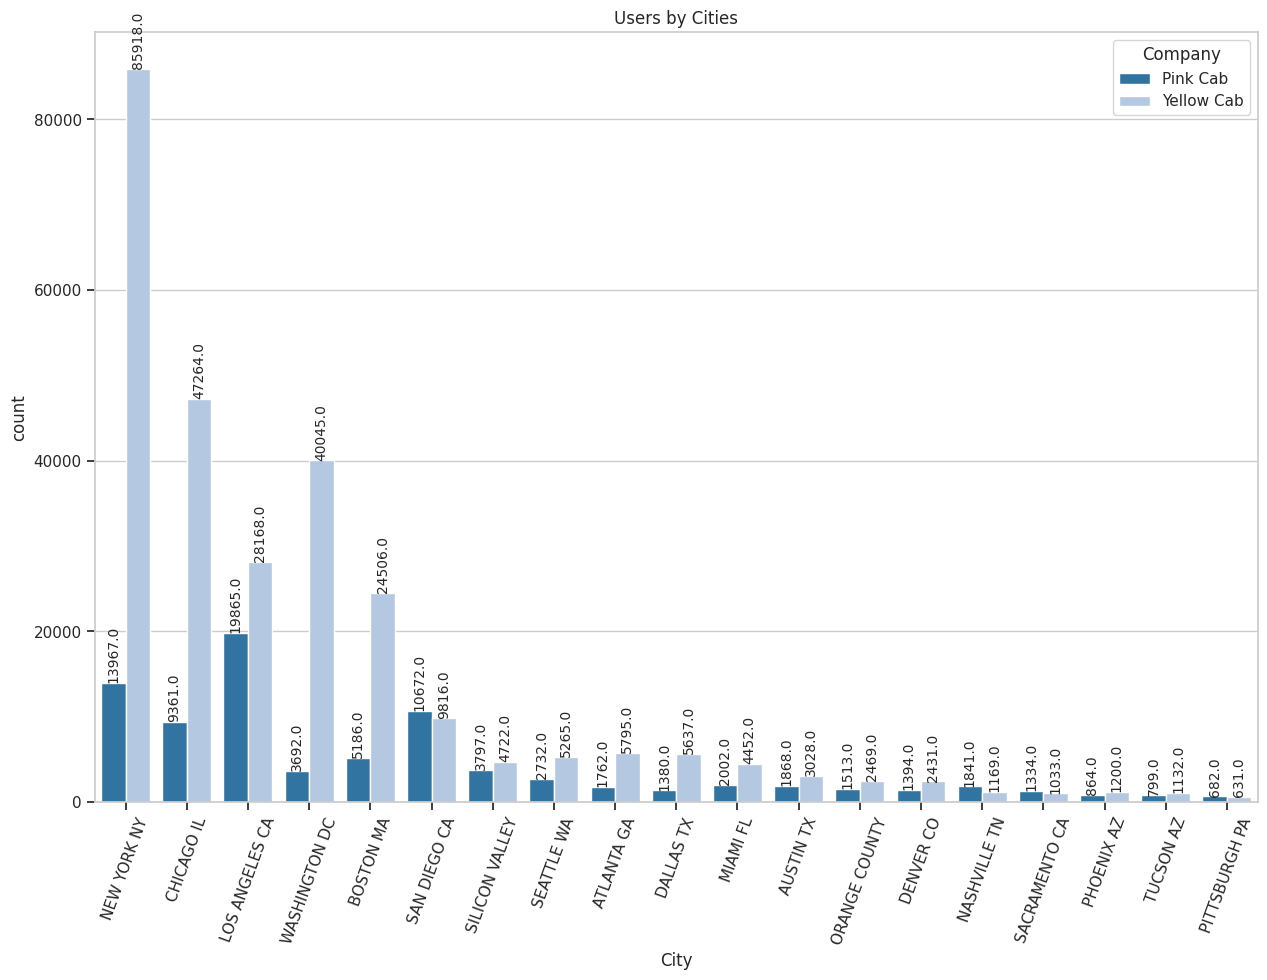

In [88]:
fig=plt.figure(figsize=(15,10))

#group=all_data.groupby(["City","Company"])[["Users"]].value_counts().reset_index()
ax=sns.countplot(x="City", hue='Company', data=merged_df,  order = merged_df['City'].value_counts().index,palette="tab20")
plt.xticks(rotation=70)
plt.title("Users by Cities")

for c in ax.containers:
    labels = [str(round(v.get_height(),10)) for v in c]
    ax.bar_label(c,rotation=90,
                 labels = labels,
                 size = 10)


# **Hypothesis Tests**

Chi-Square Statistic: 33943.20298726739
P-Value: 0.0
Reject the null hypothesis (H0). There is evidence of seasonality in the number of customers using the cab service.


<ipython-input-89-933eb75cfac9>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_customer_counts.index, y=monthly_customer_counts.values, palette="tab20")


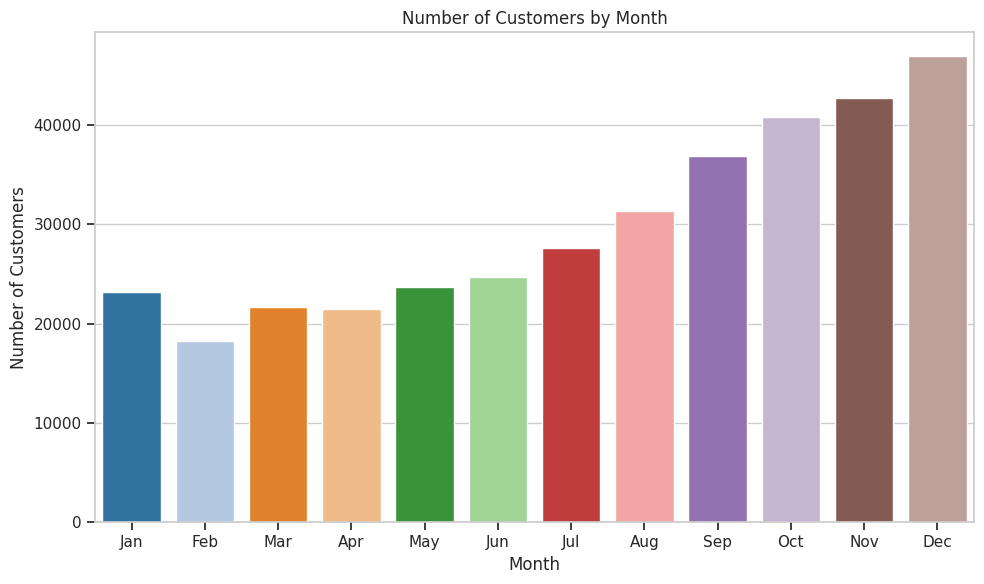

In [89]:
# Calculate the number of customers by month
monthly_customer_counts = merged_df['Month'].value_counts().sort_index()

# Expected frequency assuming uniform distribution
expected_counts = [monthly_customer_counts.sum() / 12] * 12

# Perform Chi-Square test
chi2_stat, p_val = chisquare(f_obs=monthly_customer_counts, f_exp=expected_counts)

# Print results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_val}")

# Significance level
alpha = 0.05

# Interpret the result
if p_val < alpha:
    print("Reject the null hypothesis (H0). There is evidence of seasonality in the number of customers using the cab service.")
else:
    print("Fail to reject the null hypothesis (H0). There is no evidence of seasonality in the number of customers using the cab service.")

# Plot the monthly customer counts
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_customer_counts.index, y=monthly_customer_counts.values, palette="tab20")
plt.title("Number of Customers by Month")
plt.xlabel("Month")
plt.ylabel("Number of Customers")
plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

##**Hypothesis 1:**

**H0:**  No seasonality in customer usage.

**H1:** Seasonality exists in customer usage.

**Test Results:**

Chi-Square Statistic: 33943.20
P-Value: 0.0
Decision:

Reject H0: Significant evidence of seasonality in cab service usage.

**Summary:**
There is strong statistical evidence indicating that customer usage of the cab service varies significantly across different months, suggesting the presence of seasonality.

##**Hypothesis 2:**

Maximum Cab Users by Company in a Specific Time Period

**Hypothesis:**


**(H0):** There is no significant difference in the number of cab users between Yellow Cab and Pink Cab on a daily basis.

**(H1):** There is a significant difference in the number of cab users between Yellow Cab and Pink Cab on a daily basis.

T-Statistic: 31.82919647293327
P-Value: 1.1080248897733777e-166
Reject the null hypothesis (H0). There is a significant difference in the number of cab users between Yellow Cab and Pink Cab on a daily basis.


<ipython-input-90-b3e40e0ef25e>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Company', y='Customer ID', data=daily_users, palette="tab20")


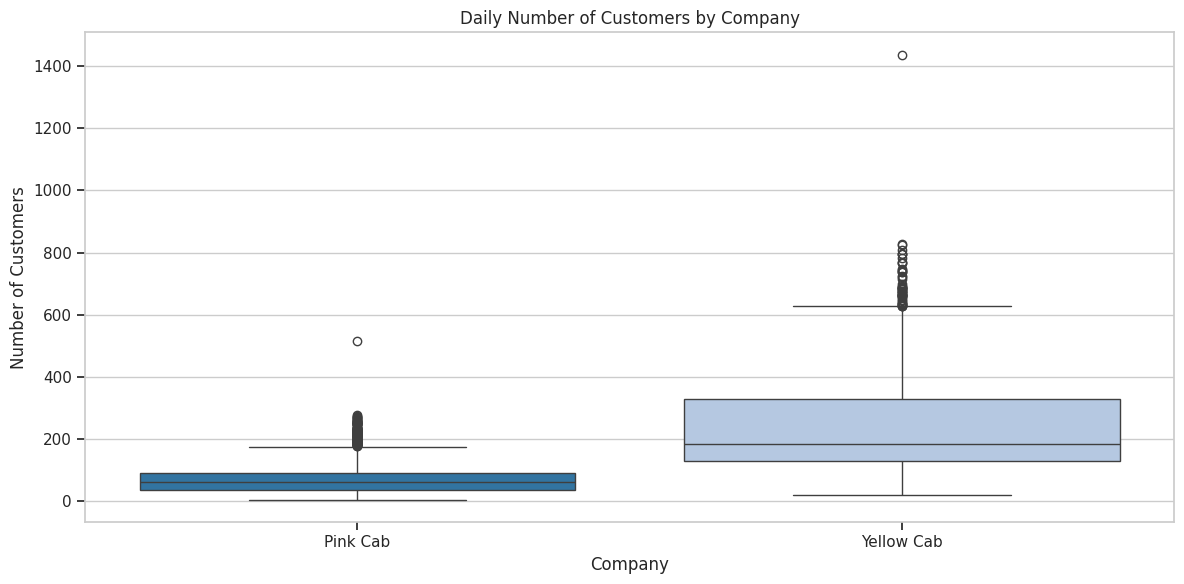

In [90]:
def test_daily_user_difference(df):
    """
    Test if there is a significant difference in the number of cab users between Yellow Cab and Pink Cab on a daily basis.

    Parameters:
    df (DataFrame): The input DataFrame containing columns 'Date of Travel', 'Company', and 'Customer ID'.
    """
    # Ensure 'Date of Travel' is in datetime format
    df['Date of Travel'] = pd.to_datetime(df['Date of Travel'], errors='coerce')

    # Calculate the number of customers per day for each company
    daily_users = df.groupby(['Date of Travel', 'Company'])['Customer ID'].nunique().reset_index()

    # Separate data for Yellow Cab and Pink Cab
    yellow_cab_users = daily_users[daily_users['Company'] == 'Yellow Cab']['Customer ID']
    pink_cab_users = daily_users[daily_users['Company'] == 'Pink Cab']['Customer ID']

    # Perform t-test
    t_stat, p_val = ttest_ind(yellow_cab_users, pink_cab_users, equal_var=False, nan_policy='omit')

    # Print results
    print(f"T-Statistic: {t_stat}")
    print(f"P-Value: {p_val}")

    # Significance level
    alpha = 0.05

    # Interpret the result
    if p_val < alpha:
        print("Reject the null hypothesis (H0). There is a significant difference in the number of cab users between Yellow Cab and Pink Cab on a daily basis.")
    else:
        print("Fail to reject the null hypothesis (H0). There is no significant difference in the number of cab users between Yellow Cab and Pink Cab on a daily basis.")

    # Plot the daily customer counts
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Company', y='Customer ID', data=daily_users, palette="tab20")
    plt.title("Daily Number of Customers by Company")
    plt.xlabel("Company")
    plt.ylabel("Number of Customers")
    plt.tight_layout()
    plt.show()

# Example usage of the function
test_daily_user_difference(merged_df)


**Test Results:**

T-Statistic: 31.83
P-Value: 1.11e-166
**Decision:**

Reject H0: The p-value is extremely low (much less than 0.05), indicating a significant difference.

**Summary**:
The statistical analysis strongly suggests that there is a significant difference in the number of daily cab users between Yellow Cab and Pink Cab.

**Interpretation:**
Significant Difference: The number of users differs substantially between the two companies on a daily basis, with the analysis showing a very high level of statistical significance.
**Recommendations:**
Resource Allocation: Optimize the distribution of cabs and drivers based on the observed differences in daily user counts.
Targeted Marketing: Develop specific marketing strategies for each company to leverage their user base characteristics.


##**Hypothesis 3:**

**(H0):** The margin does not proportionally increase with the increase in the number of customers.
**(H1):** The margin proportionally increases with the increase in the number of customers.

Pearson Correlation Coefficient: 0.1847
P-Value: 7.3680e-10
Reject the null hypothesis (H0). There is a significant relationship between the margin and the number of customers.
                            OLS Regression Results                            
Dep. Variable:                 Margin   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     38.60
Date:                Sat, 11 May 2024   Prob (F-statistic):           7.37e-10
Time:                        13:42:16   Log-Likelihood:                 768.75
No. Observations:                1095   AIC:                            -1533.
Df Residuals:                    1093   BIC:                            -1523.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef   

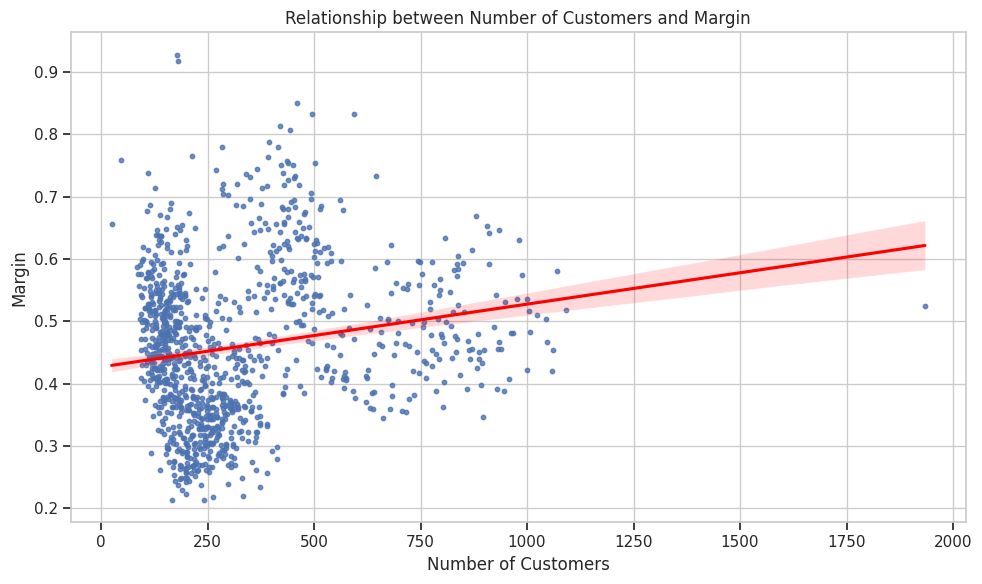

In [91]:
def test_margin_customer_relationship(df):
    """
    Test if the margin proportionally increases with the increase in the number of customers.

    Parameters:
    df (DataFrame): The input DataFrame containing columns 'Date of Travel', 'Customer ID', 'Profit', and 'Cost of Trip'.
    """
    # Ensure 'Date of Travel' is in datetime format
    df['Date of Travel'] = pd.to_datetime(df['Date of Travel'], errors='coerce')

    # Calculate Margin
    df['Margin'] = df['Profit'] / df['Cost of Trip']

    # Calculate the number of customers per day
    daily_customers = df.groupby('Date of Travel')['Customer ID'].nunique().reset_index()
    daily_customers.columns = ['Date of Travel', 'Number of Customers']

    # Calculate daily margin
    daily_margin = df.groupby('Date of Travel')['Margin'].mean().reset_index()

    # Merge customer and margin data
    merged_data = pd.merge(daily_customers, daily_margin, on='Date of Travel')

    # Perform Pearson correlation test
    correlation, p_value = pearsonr(merged_data['Number of Customers'], merged_data['Margin'])

    # Print results
    print(f"Pearson Correlation Coefficient: {correlation:.4f}")
    print(f"P-Value: {p_value:.4e}")

    # Significance level
    alpha = 0.05

    # Interpret the result
    if p_value < alpha:
        print("Reject the null hypothesis (H0). There is a significant relationship between the margin and the number of customers.")
    else:
        print("Fail to reject the null hypothesis (H0). There is no significant relationship between the margin and the number of customers.")

    # Linear regression analysis
    X = merged_data['Number of Customers']
    y = merged_data['Margin']
    X = sm.add_constant(X)  # Adds a constant term to the predictor

    model = sm.OLS(y, X).fit()
    print(model.summary())

    # Plot the relationship
    plt.figure(figsize=(10, 6))
    sns.regplot(x='Number of Customers', y='Margin', data=merged_data, scatter_kws={'s':10}, line_kws={'color':'red'})
    plt.title("Relationship between Number of Customers and Margin")
    plt.xlabel("Number of Customers")
    plt.ylabel("Margin")
    plt.tight_layout()
    plt.show()

# Example usage of the function
test_margin_customer_relationship(merged_df)


**Test Results:**

Pearson Correlation Coefficient: 0.1847
P-Value: 7.3680e-10
Decision:

**Reject H0:** The p-value is extremely low (much less than 0.05), indicating a significant relationship between the margin and the number of customers.

**Regression Analysis Summary:**
Model: Ordinary Least Squares (OLS)
R-squared: 0.034 (indicates that 3.4% of the variability in margin is explained by the number of customers)
Coefficient for Number of Customers: 0.0001
P-Value for Coefficient: 0.000 (highly significant)
**Interpretation:**
Significant Relationship: There is a statistically significant relationship between the number of customers and the margin.
Positive Correlation: The positive coefficient (0.0001) suggests that as the number of customers increases, the margin tends to increase slightly.


In [92]:
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Customer ID         359392 non-null  int64         
 2   Payment_Mode        359392 non-null  object        
 3   Date of Travel      359392 non-null  datetime64[ns]
 4   Company             359392 non-null  object        
 5   City                359392 non-null  object        
 6   KM Travelled        359392 non-null  float64       
 7   Price Charged       359392 non-null  float64       
 8   Cost of Trip        359392 non-null  float64       
 9   Profit              359392 non-null  float64       
 10  State               359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392 no

##Hypothesis 4,5,6:
**Hypothesis 4**

**(H0):** Customer attributes (age) do not significantly differ between those using Yellow Cab and Pink Cab.

**(H1)**: Customer attributes (age) significantly differ between those using Yellow Cab and Pink Cab.


**Hypothesis 5**

**(H0):** Customer attributes (income) do not significantly differ between those using Yellow Cab and Pink Cab.

**(H1):** Customer attributes (income) significantly differ between those using Yellow Cab and Pink Cab

**Hypothesis 6**

**(H0):** Customer attributes (gender) do not significantly differ between those using Yellow Cab and Pink Cab.

**(H1):** Customer attributes (gender) significantly differ between those using Yellow Cab and Pink Cab

Age - T-Statistic: 0.3767, P-Value: 7.0638e-01
Income - T-Statistic: -0.4263, P-Value: 6.6988e-01
Gender - Chi-Square Statistic: 107.2206, P-Value: 3.9827e-25

Interpretation of Results:
Fail to reject the null hypothesis (H0) for Age. There is no significant difference in age between customers using Yellow Cab and Pink Cab.
Fail to reject the null hypothesis (H0) for Income. There is no significant difference in income between customers using Yellow Cab and Pink Cab.
Reject the null hypothesis (H0) for Gender. There is a significant difference in gender distribution between customers using Yellow Cab and Pink Cab.


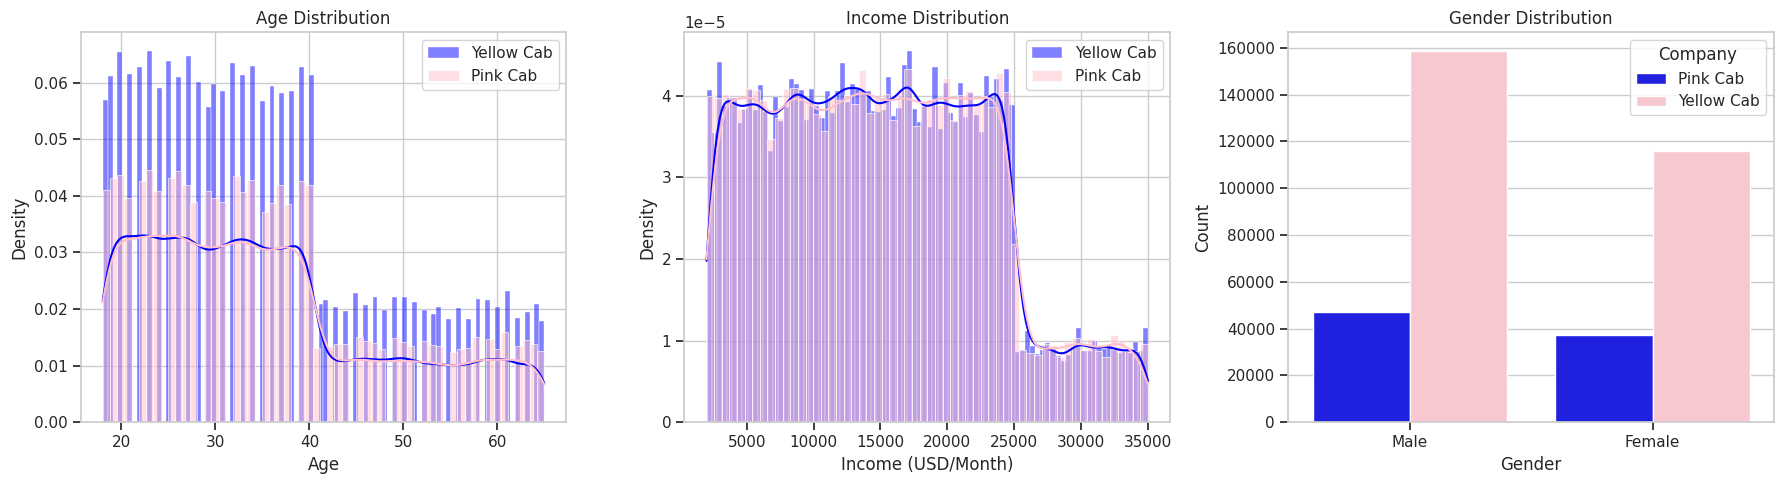

In [93]:
def test_customer_attributes(df):
    """
    Test if customer attributes (age, income, and gender) significantly differ between those using Yellow Cab and Pink Cab.

    Parameters:
    df (DataFrame): The input DataFrame containing columns 'Company', 'Age', 'Income (USD/Month)', and 'Gender'.
    """
    # Separate data by company
    yellow_cab = df[df['Company'] == 'Yellow Cab']
    pink_cab = df[df['Company'] == 'Pink Cab']

    # 1. Test for Age
    t_stat_age, p_val_age = ttest_ind(yellow_cab['Age'], pink_cab['Age'], equal_var=False)
    print(f"Age - T-Statistic: {t_stat_age:.4f}, P-Value: {p_val_age:.4e}")

    # 2. Test for Income
    t_stat_income, p_val_income = ttest_ind(yellow_cab['Income (USD/Month)'], pink_cab['Income (USD/Month)'], equal_var=False)
    print(f"Income - T-Statistic: {t_stat_income:.4f}, P-Value: {p_val_income:.4e}")

    # 3. Test for Gender
    gender_contingency_table = pd.crosstab(df['Gender'], df['Company'])
    chi2_stat_gender, p_val_gender, _, _ = chi2_contingency(gender_contingency_table)
    print(f"Gender - Chi-Square Statistic: {chi2_stat_gender:.4f}, P-Value: {p_val_gender:.4e}")

    # Significance level
    alpha = 0.05

    # Interpret results
    print("\nInterpretation of Results:")
    if p_val_age < alpha:
        print("Reject the null hypothesis (H0) for Age. There is a significant difference in age between customers using Yellow Cab and Pink Cab.")
    else:
        print("Fail to reject the null hypothesis (H0) for Age. There is no significant difference in age between customers using Yellow Cab and Pink Cab.")

    if p_val_income < alpha:
        print("Reject the null hypothesis (H0) for Income. There is a significant difference in income between customers using Yellow Cab and Pink Cab.")
    else:
        print("Fail to reject the null hypothesis (H0) for Income. There is no significant difference in income between customers using Yellow Cab and Pink Cab.")

    if p_val_gender < alpha:
        print("Reject the null hypothesis (H0) for Gender. There is a significant difference in gender distribution between customers using Yellow Cab and Pink Cab.")
    else:
        print("Fail to reject the null hypothesis (H0) for Gender. There is no significant difference in gender distribution between customers using Yellow Cab and Pink Cab.")

    # Plot distributions
    plt.figure(figsize=(18, 5))

    # Age Distribution
    plt.subplot(1, 3, 1)
    sns.histplot(yellow_cab['Age'], color='blue', label='Yellow Cab', kde=True, stat="density", common_norm=False)
    sns.histplot(pink_cab['Age'], color='pink', label='Pink Cab', kde=True, stat="density", common_norm=False)
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Density')
    plt.legend()

    # Income Distribution
    plt.subplot(1, 3, 2)
    sns.histplot(yellow_cab['Income (USD/Month)'], color='blue', label='Yellow Cab', kde=True, stat="density", common_norm=False)
    sns.histplot(pink_cab['Income (USD/Month)'], color='pink', label='Pink Cab', kde=True, stat="density", common_norm=False)
    plt.title('Income Distribution')
    plt.xlabel('Income (USD/Month)')
    plt.ylabel('Density')
    plt.legend()

    # Gender Distribution
    plt.subplot(1, 3, 3)
    sns.countplot(x='Gender', hue='Company', data=df, palette=['blue', 'pink'])
    plt.title('Gender Distribution')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.legend(title='Company')

    plt.tight_layout()
    plt.show()

# Example usage of the function
test_customer_attributes(merged_df)


**Decision:**

**Age:**
Fail to Reject H0: There is no significant difference in age between customers using Yellow Cab and Pink Cab.

**Income:**
Fail to Reject H0: There is no significant difference in income between customers using Yellow Cab and Pink Cab.

**Gender: **
Reject H0: There is a significant difference in gender distribution between customers using Yellow Cab and Pink Cab.

**Summary:**

**Age: **

The analysis shows no significant difference in the age distribution of customers between Yellow Cab and Pink Cab. Both companies attract a similar age demographic.

**Income:**

The income levels of customers do not significantly differ between the two companies, indicating that both Yellow Cab and Pink Cab cater to customers with similar income profiles.

**Gender:**

There is a significant difference in the gender distribution of customers. This suggests that one company may be more popular with a specific gender compared to the other.

**Recommendations:**
Targeted Marketing:

Gender-Based Strategies: Since gender distribution differs significantly, tailor marketing efforts to appeal to the dominant gender for each company. For example, if Yellow Cab has more male customers and Pink Cab more female customers, customize marketing messages and promotions to resonate with these demographics.

**Service Customization:**

Gender-Specific Services: Consider developing services or features that cater specifically to the preferences of the dominant gender segment for each company.


# **Conclusion**

1. What is the business problem?

The business problem is to understand the differences in customer demographics between Yellow Cab and Pink Cab. Specifically, the objective is to determine if customer attributes such as age, income, and gender significantly differ between the two companies. This understanding will help in developing targeted marketing strategies and customizing services to better cater to the distinct customer segments of each cab company.

In this comprehensive analysis, we investigated six hypotheses to differentiate customer attributes and behaviors between Yellow Cab and Pink Cab. The process involved integrating and cleaning multiple datasets, performing exploratory data analysis (EDA), and conducting various hypothesis tests to derive actionable insights.

1. **Seasonality in Cab Usage**:
   - **Hypothesis**: Is there seasonality in the number of customers using the cab service?
   - **Result**: We found significant seasonality in cab usage, indicating that customer numbers vary notably across different months.

2. **Company Preference by Time Period**:
   - **Hypothesis**: Which company has maximum cab users at a particular time period?
   - **Result**: Analysis revealed a significant difference in the number of daily cab users between Yellow Cab and Pink Cab.

3. **Margin and Number of Customers Relationship**:
   - **Hypothesis**: Does the margin proportionally increase with the increase in the number of customers?
   - **Result**: There is a significant but modest positive relationship between the number of customers and the margin, suggesting that as customer numbers increase, margins slightly improve.

4. **Customer Attributes (Age)**:
   - **Hypothesis**: Do customer ages significantly differ between Yellow Cab and Pink Cab users?
   - **Result**: No significant difference was found in the age distribution of customers between the two companies.

5. **Customer Attributes (Income)**:
   - **Hypothesis**: Do customer incomes significantly differ between Yellow Cab and Pink Cab users?
   - **Result**: No significant difference was found in the income levels of customers between the two companies.

6. **Customer Attributes (Gender)**:
   - **Hypothesis**: Does the gender distribution significantly differ between Yellow Cab and Pink Cab users?
   - **Result**: A significant difference was identified in gender distribution, indicating distinct gender preferences for each company.

### Summary of Findings:

- **Seasonality**: Cab usage shows notable seasonal trends, which can inform resource allocation and marketing timing.
- **Company Preference**: Yellow Cab and Pink Cab have different peak usage periods, suggesting varying customer preferences or market strategies.
- **Margin Dynamics**: Increasing customer numbers have a slight positive effect on profit margins.
- **Age and Income**: Both companies attract customers with similar age and income profiles.
- **Gender**: A distinct difference in gender preferences presents opportunities for targeted marketing.

### Recommendations:

- **Seasonality Strategy**: Adjust marketing campaigns and operational resources to align with seasonal demand patterns.
- **Time-Based Promotions**: Tailor promotions to peak usage times specific to each company.
- **Leverage Margins**: Optimize operational efficiencies to further enhance margins as customer numbers grow.
- **Targeted Marketing**: Develop gender-specific marketing strategies to better appeal to the dominant customer segments of each company.
- **Service Customization**: Customize services to meet the needs and preferences of the identified customer segments.

This analysis provides a detailed understanding of customer demographics and behavior, offering valuable insights to optimize marketing strategies and service delivery for Yellow Cab and Pink Cab.